# 230793835 MSc Mathematics "Statistical Analysis of Sea Turtle Foraging"

In this Jupyter Notebook, I provide the accompanying code to my MSC thesis entitled "Statistical Analysis of Sea Turtle Foraging". The basis of this thesis to determine whether the foraging patterns of sea turtles obey the theory of Brownian motion. 

The three sea turtles that were monitored are "speedy", "lola", and "manou". Each turtle has its own .csv file, containing timestamped latitude and longitude data. Herein, we extract the speed and velocity distributions of each turtle and conduct further analyses to determine to what extent the sea turtles' foraging patterns are congruent with the theory of Brownian motion.

## Contents <a id='section0'></a>

##### I.    [Imported Libraries](#section1)
##### II.   [Stochastic Processes](#section2)
##### III.  [Introducing the 'TurtleData' Class](#section3)
##### IV.   [Plotting the Turtle Trajectories](#section4)
##### V.    [Plotting the $x$-velocity, $y$-velocity, and Speed Distributions](#section5)
##### VI.   [Plotting a Boxplot to Understand Time Variation in GPS Recordings](#section6)
##### VII.  [Interpolating the Data](#section7)
##### VIII. [Cleaning the Data](#section8)
##### IX.   [Cleaning and Interpolating the Data](#section9)
##### X.    [Fitting the Cleaned and Interpolated Data to Various Distributions](#section10)
##### XI.   [Semi-log Plots and Log-log Plots to Analyse the Tails](#section11)
##### XII.  [Quantile-Quantile Plots with Coefficients of Determination](#section12)
##### XIII. [Cleaned and Interpolated Plots](#section13)
##### XIV.  [Plots of Speed Throughout the Foraging Period](#section14)
##### XV.   [Mean Square Displacement Calculation](#section15)
##### XVI.  [Jupyter Notebook Bibliography](#section16)








## I. Imported Libraries <a id='section1'></a>


In this section, we introduce the required libraries for the code. Commentary around each import statement describes its use in this thesis. 

##### Click [here](#section0) to return to the Contents page.

In [202]:
import random # This is used to model the simple random walk.

from matplotlib.ticker import MaxNLocator # This is used to change the y-axis to ascend in integer increments. 
                                          # Specifically, this is used for the random walk plot.

from collections import Counter # The Counter method is used to count the number of walkers ('counts') that are in position ('items')

import unittest # This is used for more advanced assertions. In our case, we used it to test whether an input is an instance of a given class.

import pandas as pd # Pandas is used to construct dataframes of the .csv files, allowing us to filter the data appropriately.

import geopandas as gpd # GeoPandas allows the user to plot world map shapefle data to a plot. This enables us to visualise 
                        # the trajectory of each turtle with respect to the shapes of Cabo Verde and the coast of West Africa.

from shapely.geometry import Point, LineString # Point and LineString allows us to plot lat-long data and connect th epoints 
                                               # linearly to showtrajectories.

import matplotlib.pyplot as plt # matplotlib enables us to produce and customise many of the plots visible throughout the code.  

import numpy as np # NumPy is a library which contains multiple methods required for data manipulation, particularly when working with arrays. 

import datetime # Datetime allows us to work with timestamped data by rewriting timestamps in standard form and allowing us to extract the seconds
                # in between chronologically adjacent datapoints. 

import scipy.stats as stats # scipy.stats is used to fit the empirical data to various distributions (such as Normal, Gamma, Exponential, etc.) 

import statsmodels.api as sm # Statsmodels.api is used to produce the quantile-quantile plots.

from sklearn.metrics import r2_score # R2_score is for the coefficient of determination; a supplement to the quintile-quintile plots that numerically
                                     # determines how well the empirical data fits a given distribution.


## II. Stochastic Processes <a id='section2'></a>

##### Click [here](#section0) to return to the Contents page.

In [192]:
class StochasticProcessSimulation():
    '''
    This is a parent class for the below types of stochastic process simulations. I have done this to save space in 
    redefining the common attributes between the stochastic processes discussed in this thesis. 

    Attributes:
    - self.starting_point = starting_point
        This defines the starting point of the stochastic process simulation
    - self.step_size = step_size
        An attribute to store the step size of the simulation
    - self.total_duration = total_duration
        This stores the total run time for the simulation

    Methods:
        There are no methods associated with this class. One should seek to create an instance of one of the inheritting
        classes below in order to plot a stochastic process simulation. 
    '''
        
    def __init__(self, starting_point, step_size, total_duration):
        self.starting_point = starting_point # This defines the starting point for the stochastic process simulation
        self.step_size = step_size # This defines the step size for the stochastic process simulation
        self.total_duration = total_duration # This defines the total duration for the stochastic process simulation

        assert isinstance(self.starting_point, (int, float)), "Ensure that the starting point is of type integer or float."
        assert isinstance(self.step_size, (int, float)), "Ensure that the step size is of type integer or float."
        assert isinstance(self.total_duration, (int, float)), "Ensure that the total duration is of type integer or float."
        assert self.total_duration % self.step_size == 0, "Ensure that the total duration is divisible by step size."


class RandomWalk(StochasticProcessSimulation):
    '''
    This is a class to allow the user to plot a simulation of a random walk.

    Attributes (inheretted from class "StochasticProcessSimulation"):
    - self.starting_point = starting_point
        This defines the starting point of the stochastic process simulation
    - self.step_size = step_size
        An attribute to store the step size of the simulation
    - self.total_duration = total_duration
        This stores the total run time for the simulation

    Methods:
    - plot_simulation(self)
        This method simulates and plots a random walk, given an initial starting point, total run time, and step size.
    '''
    def plot_simulation(self):
        '''
        This method simulates and plots a random walk, given an initial starting point, total run time, and step size.
        '''
        number_time_steps = int(self.total_duration / self.step_size)+1
        time_steps_grid = np.linspace(0, self.total_duration, number_time_steps)
        random_walk_steps = np.random.choice([-1, 1], size=number_time_steps)
        random_walk_steps[0] = self.starting_point
        random_walk_values = np.cumsum(random_walk_steps)

        plt.figure(figsize=(8, 4))
        plt.plot(time_steps_grid, random_walk_values, linewidth=0.5, color='darkblue')
        plt.plot(time_steps_grid, random_walk_values, marker = 'o', markeredgecolor='black', color='blue')
        plt.xlabel(f"$n$")
        plt.ylabel(f"$S_n$")
        plt.title(f"1-D Random Walk Simulated for {self.total_duration} Steps")
        plt.grid()
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.text(0.8, 0.1, f'$S_0 = {self.starting_point:.2f}$\n$\\Delta n = {self.step_size:.2f}$', transform=plt.gca().transAxes,
            fontsize=10, color='black', bbox=dict(facecolor='white'))

        
    def plot_position_distribution(self):
        '''
        This method demonstrates the Gaussian evolution of the position distribution over increasing step numbers.
        '''
        def each_step(x, j):
            y = x + np.random.choice([-1, 1], size = len(x)) # length is number of walkers
            return y

        cmap = plt.get_cmap('plasma', 11)

        for j in range(0, 11): # index ranging from 0 to 11 to plot each distribution for n_steps
            n_walkers = 10000
            n_steps = j # Defining the n steps for each iteration of j.

            steps = np.zeros([n_walkers]) # An empty array to assign the number of steps for each random walk iteration. 

            for _ in range(n_steps):

                steps = each_step(steps, j) # Simulating the random walk, given a j.

            member_steps = Counter(steps) # The Counter method is used here to collate the number of steps for each member
                                          # of the ensemble

            member_steps = {k / (20): v / (n_walkers) for k, v in member_steps.items()}
                            # Altering the values so that the domain is [-0.5, 0.5] and that 
                            # the frequency is a relative frequency.

            mu, sigma = np.mean(steps), np.std(steps) # Defining the mean and standard deviation (as we expect the data to be
                                                      # normally distributed)
 
            if j in [0, 1, 3, 6, 10]:

                x_vals = list(member_steps.keys())    # Assigning a new variable 'x_vals' for legibility.
                y_vals = list(member_steps.values())  # Assigning a new variable 'y_vals' for legibility.
                sorted_steps = sorted(member_steps.items()) # Sorting them as plt.plot was not giving a coherent line plot
                sorted_x_vals, sorted_y_vals = zip(*sorted_steps) # Remerging them as a dictionary for plotting. 

                plt.plot(sorted_x_vals, sorted_y_vals, color=cmap(j+1), marker = 'o', markeredgecolor = 'black', 
                         label=f'n={j}; $\\mu$={abs(mu):.1f}; $\\sigma$={sigma:.2f}')
 
            plt.grid()
            plt.xlabel(f"Position /  $( 2 \\cdot n_{{max}})$")
            plt.xlim(-0.5, 0.5)

            plt.ylabel("Relative Frequency")
            plt.title(f"Empirical Position Distribution \n {n_walkers:,} Walkers; $n_{{max}} = $ {n_steps:,}")
            plt.legend(fontsize=8)

    def plot_position_distribution_images_for_animation(self):
        '''
        This method demonstrates the Gaussian evolution of the position distribution over increasing step numbers by producing images
        to be turned into a GIF animation. An external web-based application (https://www.ezgif.com) was used to convert 
        the series of images into a GIF animation.
        '''
        def each_step(x, j):
            y = x + np.random.choice([-1, 1], size = len(x)) # length is number of walkers
            return y

        cmap = plt.get_cmap('plasma', 11)

        for j in range(0, 11):  # index ranging from 0 to 11 to plot each distribution for n_steps
            n_walkers = 10000
            n_steps = j # Defining the n steps for each iteration of j.

            steps = np.zeros([n_walkers]) # An empty array to assign the number of steps for each random walk iteration.

            for _ in range(n_steps):

                steps = each_step(steps, j) # Simulating the random walk, given a j.

            member_steps = Counter(steps) # The Counter method is used here to collate the number of steps for each member
                                          # of the ensemble and returns a dictionary of 'items' and their respective frequency ('counts')

            member_steps = {k / (20): v / (n_walkers) for k, v in member_steps.items()}
                            # Altering the values so that the domain is [-0.5, 0.5] and that 
                            # the frequency is a relative frequency.
            
            mu, sigma = np.mean(steps), np.std(steps) # Defining the mean and standard deviation (as we expect the data to be
                                                      # normally distributed)
 

            x_vals = list(member_steps.keys())    # Assigning a new variable 'x_vals' for legibility.
            y_vals = list(member_steps.values())  # Assigning a new variable 'y_vals' for legibility.
            sorted_items = sorted(member_steps.items()) # Sorting them as plt.plot was not giving a coherent line plot
            sorted_x_vals, sorted_y_vals = zip(*sorted_items) # Remerging them as a dictionary for plotting. 

            plt.plot(sorted_x_vals, sorted_y_vals, color=cmap(j+1), marker = 'o', markeredgecolor = 'black', 
                    label=f'n={j}; $\\mu$={abs(mu):.1f}; $\\sigma$={sigma:.2f}')
 
            plt.grid()
            plt.xlabel(f"Position /  $( 2 \\cdot n_{{max}})$")
            plt.xlim(-0.5, 0.5) # Fixing x-axis limits to avoid auto-scaling and to keep each frame of the GIF uniformally formatted.
            plt.ylim(-0.1, 1.1) # Fixing y-axis limits to avoid auto-scaling and to keep each frame of the GIF uniformally formatted.
                
            plt.ylabel("Relative Frequency")
            plt.title(f"Empirical Position Distribution \n {n_walkers:,} Walkers; $n_{{max}} = $ {n_steps:,}")
            plt.legend(fontsize=8)

            plt.savefig(f"{j}_animation", bbox_inches = "tight") # Saving each frame of the GIF individually as PNGs.
            plt.close() # This 'resets' the plotting environment to ensure that frames are not being plotted over one another. 


            
class WienerProcess(StochasticProcessSimulation):
    '''
    This is a class to allow the user to plot a simulation of a Wiener process.

    Attributes (inheretted from class "StochasticProcessSimulation"):
    - self.starting_point = starting_point
        This defines the starting point of the stochastic process simulation
    - self.step_size = step_size
        An attribute to store the step size of the simulation
    - self.total_duration = total_duration
        This stores the total run time for the simulation

    Methods:
    - plot_simulation(self)
        This method simulates and plots a Wiener process, given an initial starting point, total run time, and step size.
    '''
    def plot_simulation(self):
        '''
        This method simulates and plots a Wiener process, given an initial starting point, total run time, and step size.
        '''
        number_time_steps = int(self.total_duration / self.step_size)

        time_steps_grid = np.linspace(self.starting_point, self.total_duration, number_time_steps)

        wiener_steps = np.sqrt(self.step_size) * np.random.randn(number_time_steps)

        wiener_steps[0] = 0
        
        wiener_values = np.cumsum(wiener_steps)

        plt.figure(figsize=(8, 4))
        plt.plot(time_steps_grid, wiener_values, linewidth=0.5, color='blue')
        plt.plot(time_steps_grid, wiener_values, marker = 'o', markeredgecolor='black', color='blue')

        plt.xlabel(f"$t$")
        plt.ylabel(f"$W(t)$")
        plt.title(f"1-D Wiener Process Simulated for {self.total_duration} Seconds")
        plt.grid()
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.text(0.8, 0.1, f'$W(0) = {self.starting_point:.2f}$\n$dt = {self.step_size:.2f}$', transform=plt.gca().transAxes,
            fontsize=10, color='black', bbox=dict(facecolor='white'))


class OrnsteinUhlenbeck(StochasticProcessSimulation):
    '''
    This is a class to allow the user to plot a simulation of an Ornstein-Uhlenbeck process.

    Attributes (inheretted from class "StochasticProcessSimulation"):
    - self.starting_point = starting_point
        This defines the starting point of the stochastic process simulation
    - self.step_size = step_size
        An attribute to store the step size of the simulation
    - self.total_duration = total_duration
        This stores the total run time for the simulation
        
    - self.theta = theta
    - self.mu = mu
    - self.sigma = sigma
            # These attributes define the parameters of the Ornstein-Uhlenbeck process

    Methods:
    - plot_simulation(self)
        This method simulates and plots a Wiener process, given an initial starting point, total run time, and step size.
    '''
    def __init__(self, starting_point, step_size, total_duration, theta, mu, sigma):
        
        self.starting_point = starting_point # This defines the starting point for the stochastic process simulation
        self.step_size = step_size # This defines the step-size for the stochastic process simulation
        self.total_duration = total_duration # This defines the total duration for the stochastic process simulation
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
            # These attributes define the parameters of thr Ornstein-Uhlenbeck process

        assert isinstance(self.starting_point, (int, float)), "Ensure that the starting point is of type integer or float."
        assert isinstance(self.step_size, (int, float)), "Ensure that the step size is of type integer or float."
        assert isinstance(self.total_duration, (int, float)), "Ensure that the total duration is of type integer or float."
        assert self.total_duration % self.step_size == 0, "Ensure that the total duration is divisible by step size."

        assert isinstance(self.theta, (int, float)), "Ensure that theta is of type integer or float."
        assert self.theta > 0, "By defintion of the OU process, theta must be positive"
        assert isinstance(self.mu, (int, float)), "Ensure that mu is of type integer or float."
        assert isinstance(self.sigma, (int, float)), "Ensure that sigma is of type integer or float."
        assert self.sigma > 0, "By defintion of the OU process, sigma must be positive"

    def plot_simulation(self):
        '''
        This method simulates and plots a Ornstein Uhlenbeck process, given an initial starting point, total run time, and step size.
        '''
        number_time_steps = int(self.total_duration / self.step_size)

        time_steps_grid = np.linspace(0, self.total_duration, number_time_steps)

        wiener_steps = np.sqrt(self.step_size) * np.random.randn(number_time_steps)

        OU_steps = np.zeros(number_time_steps)

        for i in range(1, number_time_steps):
            OU_steps[i] = OU_steps[i-1] + self.theta *(self.mu - OU_steps[i-1])*self.step_size + self.sigma*wiener_steps[i]
        
        plt.figure(figsize=(8, 4))
        plt.plot(time_steps_grid, [self.mu] * len(time_steps_grid), linewidth=2, linestyle = '--', color='red', label = 'Mean value')        
        plt.plot(time_steps_grid, OU_steps,  color='blue', linewidth=0.5)
        plt.plot(time_steps_grid, OU_steps, marker='o', markeredgecolor='black', color='blue')
        plt.xlabel(f"$t$")
        plt.ylabel(f"$U(t)$")
        plt.title(f"1-D Ornstein-Uhlenbeck Process Simulated for {self.total_duration} Seconds")
        plt.legend()
        plt.text(0.8, 0.1, f'$U(0) = {self.starting_point:.2f}$\n$\\theta = {self.theta:.2f}$\n$\\mu = {self.mu:.2f}$\n$\\sigma = {self.sigma:.2f}$\n$ dt = {self.step_size:.2f}$', transform=plt.gca().transAxes,
                fontsize=10, color='black', bbox=dict(facecolor='white'))
        plt.grid()

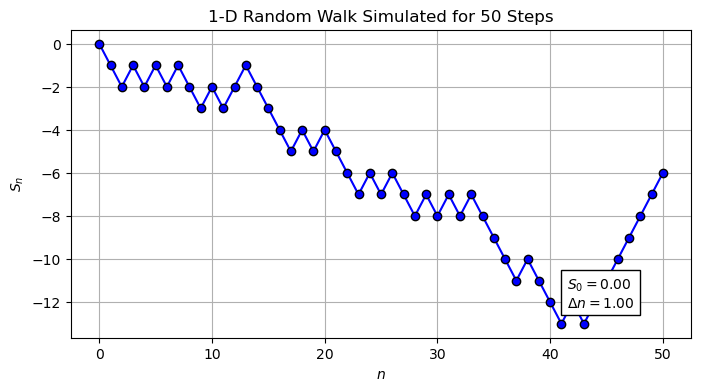

In [194]:
RW_instance = RandomWalk(0, 1, 50)
RW_instance.plot_simulation()
#plt.savefig(f"rw_sim", bbox_inches = "tight")

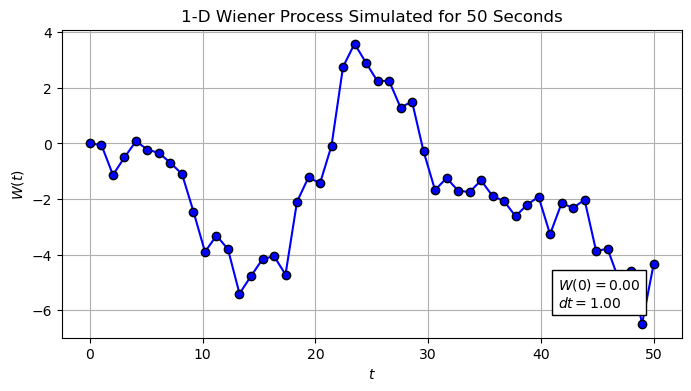

In [196]:
Wiener_instance = WienerProcess(0, 1, 50)
Wiener_instance.plot_simulation()
#plt.savefig(f"wiener_sim", bbox_inches = "tight")

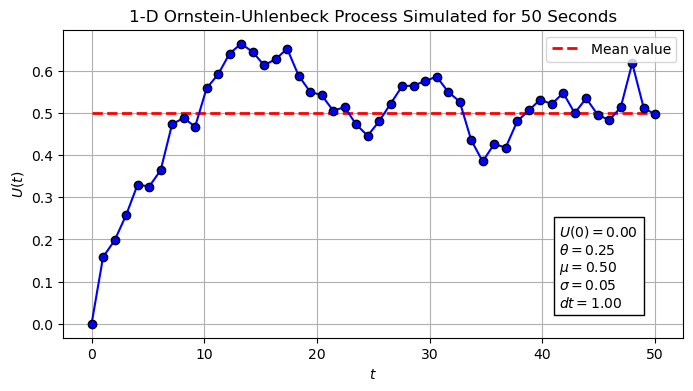

In [198]:
OU_instance = OrnsteinUhlenbeck(0, 1, 50, 0.25, 0.5, 0.05)
OU_instance.plot_simulation()
#plt.savefig(f"OU_sim", bbox_inches = "tight")

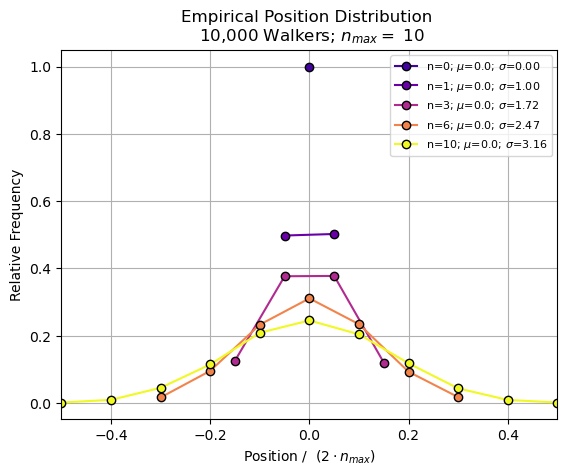

In [182]:
RW_instance = RandomWalk(0, 1, 50)
RW_instance.plot_position_distribution()
#plt.savefig(f"pos_dist_static", bbox_inches = "tight")

In [200]:
RW_instance = RandomWalk(0, 1, 50)
RW_instance.plot_position_distribution_images_for_animation()

## III.  Introducing the 'TurtleData' Class <a id='section3'></a>

In this section, we present the class (and its relevant methods) to initialise a dataframe for a given turtle's .csv file and analyse its contents. Each method has commentary to provide a more precise description of its function.

The TurtleData class enables the user to construct a dataframe of a specific turtle's .csv file. Asserts are provided throughout to ensure proper functionality. See each method's commentary below to see its purpose.

##### Click [here](#section0) to return to the Contents page.

In [413]:
class TurtleData():
    """
    This class allows the user to construct a dataframe given a turtle's .csv file. The methods throughout enable the user to ascertian whether
    the data behaves like Brownian motion.
    
    Attributes:
    - self.dataframe = pd.read_csv(f"{self.Turtle_Name}.csv")
    - self.Date = self.dataframe['Date']
    - self.Type = self.dataframe['Type']
    - self.Quality = self.dataframe['Quality']
    - self.Latitude = self.dataframe['Latitude']
    - self.Longitude = self.dataframe['Longitude']
        The above attributes allows us to store the columns of the dataframe as characteristics of the class, enabling us to provide cleaner code. 
        
    - self.lat_long_points = []
    - self.time_diff = []
    - self.x_velocity = []
    - self.y_velocity = []
    - self.speed = []
    - self.median_time_difference = []
        The above attributes allow us to store various values of the data analysis to be used across different methods of the class. This avoids
        repeating elements of some methods in other methods. 

    - self.bin_height = []
    - self.bins = []
    - self.rectangles = []
        This allows us to store the histogram data to analyse the tails of each distribution. 

    - self.is_interpolated = False
    - self.is_cleaned = False
        These provide checks to ensure that a logical order is involved in the cleaning and interpolating of the data. One may see these throughout
        some methods in assertion checks. 

    Methods:
    - check_number_of_data_points(self)
        This method simply prints the number of rows in the dataframe. This is a check to see the quantity of datapoints at each stage of the
        filtering / cleaning process. 

    - filter_quality_greater_than_measure(self, measure)
        This method enables the user to filter the data by a given quality measure. The measures in the .csv files are {7, 6, 5, 4, 3, A, B, C} and
        this method returns those data points that have a quality greater than that measure. 

    - plot_lat_long_points(self, other1 = None, other2 = None)
        This method returns a plot of the latitude and longitude points of the given turtle. The 'other' arguments allow the user to plot other
        instances of the class, enabling one to plot any combination of turtle trajectories on one plot. 

    - plot_lat_long_trajectory(self, other1 = None, other2 = None)
        This method returns a plot of the latitude and longitude points, connected by a piecewise linear line, allowing one to see the 
        trajectory of the turtle. The 'other' arguments allow the user to plot other instances of the class, enabling one to plot any 
        combination of turtle trajectories on one plot.

    - filter_by_foraging_period(self)
        This method allows the user to filter the turtle's trajectory to show its foraging period. We decide that the foraging period commences
        after each turtle's first sharp right-hand turn. 

    - haversine_formula(self, lon1, lon2, lat1, lat2)
        The Haversine formula allows the user to convert the distance between two latitude-longitude points into kilometres. This enables us to 
        compute kilometre distances between each adjacent point in a turtle's trajectory. This will then be used by other methods of this class
        to compute speeds in kilometres per hour. 

    - filter_large_entries(self, data_column)
        This method enables the use to filter a data column by a given value. This is used by other methods to appropriately filter outliers in
        the dataset.

    - calculate_speed_and_velocities(self)
        This method calculates the speed, x-velocity, and y-velocity of the given turtle's trajectory. This method then stores the values in the
        above empty attributes for later use. 

    - plot_speed_or_velocity_distribution(self, physical_quantity, fit_to_distribution = None)
        This method plots the distribution of a given physical quantity (either "speed", "x_velocity", or "y_velocity"). There is also an optional
        argument 'fit_to_distribution' which enables the user to overlay a fitted distribution to their plot. Accepted distributions include normal,
        gamma, inverse gamma, log gamma, exponential, power law, exp attenuated power law, rayeligh, gamma, chi squared, generalised gamma, and weibull. 

    - plot_boxplot(self)
        This method plots a box plot (i.e., a box-and-whisker diagram) to show the variation in time differences between latitude and longitude 
        recordings.

    - interpolate_data(self)
        This method performs linear interpolation on the latitude and longitude datasets. To do this, we use NumPy's interp method and the 
        timestep of the median time difference between the remaining points. 

    - clean_data(self)
        This method effectively 'cleans' the data. To do so, this method removes datapoints that have a sufficiently small time difference and those
        that have a too large time difference. This was done to ensure less NaN's and zeros were found in the speed dataset.

    - plot_tails_semilog_plot(self, physical_quantity)
        This method plots a semilogy plot of the tails of a given physical quantity to test whether the physical quantity decays as an exponential.
        If the tail(s) do(es) decay as an exponential, then the semilogy plot should give a straight line. If one chooses to plot the speed, then 
        an estimated exponential is given. If one chooses to plot either the x- or y- velocity, then both tails are provided on a single plot. 

    - plot_tails_loglog_plot(self, physical_quantity)
        This method plots a loglog plot of the tails of a given physical quantity to test whether the physical quantity decays as a power law.
        If the tail(s) do(es) decay as a power law, then the loglog plot should give a straight line. If one chooses to plot the speed, then 
        an estimated power law relationship is given. If one chooses to plot either the x- or y- velocity, then both tails are provided on a 
        single plot. 

    - plot_quantile_quantile(self, physical_quantity, fit_to_distribution, tail = "both")
        This method allows the user to plot a quantile-quantile plot of either speed, x-velocity, or y-velocity against data sampled from a 
        distribution. Accepted distributions include normal, gamma, inverse gamma, log gamma, exponential, power law, exp attenuated power law, 
        rayeligh, gamma, chi squared, generalised gamma, and weibull.

    - plot_speed_over_trajectory(self)
        This method plots the turtle's speed over the trajectory. The normalised speed is shown as a colourbar over the turtle's trajectory.

    - calculate_mean_square_displacement(self, duration)
        This method calculates and plots the mean squared displacement for a given turtle's trajectory.
    """
    
    def __init__(self, Turtle_Name):
        self.Turtle_Name = Turtle_Name
        assert Turtle_Name in {"speedy", "lola", "manou"}, "Turtle name must be one of 'speedy', 'lola', or 'manou'."
        
        self.dataframe = pd.read_csv(f"{self.Turtle_Name}.csv")  # This sets up the dataframe for the turtle's .csv file. 
        self.Date = self.dataframe['Date']  # Assigns the 'Date' column of the dataframe to an attribute of the class.
        self.Type = self.dataframe['Type']  # Assigns the 'Type' column of the dataframe to an attribute of the class for the type of GPS receiver 
                                            # repsonsible for the recording of that datapoint.
        self.Quality = self.dataframe['Quality'] # Assigns the 'Quality' column of the dataframe to an attribute of the class.
        self.Latitude = self.dataframe['Latitude'] # Assigns the 'Latitude' column of the dataframe to an attribute of the class.
        self.Longitude = self.dataframe['Longitude']  # Assigns the 'Longitude' column of the dataframe to an attribute of the class.
        
        self.lat_long_points = []
        self.time_diff = []
        self.x_velocity = []
        self.y_velocity = []
        self.km_x = []
        self.km_y = []
        self.speed = []
        self.median_time_difference = [] # These attributes allow use to store data to be used across methods of the class. It saves us 
                                         # having to repeat code.

        self.bin_height = []
        self.bins = []
        self.rectangles = []          # As above, these attributes also store information to be used across different methods. Particularly, these
                                      # attributes are used to analyse the tails of the physical distributions. 

        self.is_interpolated = False  # These checks ensure that interpolation does not occur twice and to allow the same methods to be used for 
                                      # interpolated data and uninterpolated data. 
        self.is_cleaned = False   # These checks ensure that cleaning does not occur twice and to allow the same methods to be used for 
                                  # clean data and unclean/raw data. 

    def check_number_of_data_points(self):
        '''This method simply prints the number of rows in the dataframe. This is a check to see the quantity of datapoints at each stage of the
        filtering / cleaning process.'''
        
        print(f"The number of data points that are remaining in the current instance of the '{self.Turtle_Name.title()}' dataset is {len(self.dataframe)}.")
    
    def filter_quality_greater_than_measure(self, measure):
        '''This method enables the user to filter the data by a given quality measure. The measures in the .csv files are {7, 6, 5, 4, 3, A, B, C} and
        this method returns those data points that have a quality greater than that measure.'''
        
        assert measure in {6, 5, 4, 3, 2, 1, 0, "A", "B", "Z"}, "The input 'measure' must be one of '6', '5', '4', '3', '2', '1', '0', 'A', 'B', or 'Z'."

        if measure == "Z":
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3', '2', '1', '0', 'A', 'B'])]
                # The .isin method checks the assigned column for uder-inputted conditions. We are using the nested 'self.dataframe' arguments
                # to filter the data by those entries that have a quality greater than "Z". This returns entries of data with quality '7', '6', 
                # '5', '4', '3', '2', '1', '0', 'A', and 'B'. One can see that this pattern follows for more stricter conditions defined below. 

        elif measure == "B":
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3', '2', '1', '0', 'A'])]

        elif measure == "A":
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3', '2', '1', '0'])]

        elif measure == 0:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3', '2', '1'])]

        elif measure == 1:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3', '2'])]

        elif measure == 2:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4', '3'])]

        elif measure == 3:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5', '4'])]

        elif measure == 4:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6', '5'])]

        elif measure == 5:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7', '6'])]

        elif measure == 6:
            self.dataframe = self.dataframe[self.dataframe['Quality'].isin(['7'])]

        else:
            raise Exception("The input 'measure' must be one of '6', '5', '4', '3', '2', '1', '0', 'A', 'B', or 'Z'.")
                # Flags an error for users attempting to input values that are not a data quality meaure, as defined in the .csv file, or
                # inputting the quality measure '7', upon which the method would return an empty dataset (since no datapoints have a quality
                # measure greater than zero. 

        self.Date = self.dataframe['Date']
        self.Type = self.dataframe['Type']
        self.Quality = self.dataframe['Quality']
        self.Latitude = self.dataframe['Latitude']
        self.Longitude = self.dataframe['Longitude']
                # This reassigns the column attributes by equating them to the columns of the current, filtered dataset.

        print(f"The quality of the '{self.Turtle_Name.title()}' dataset has been set to those entries greater than {measure}.")
                # Prints a statement to affirm to the user that the dataset has indeed been filtered. 

    def plot_lat_long_points(self, other1 = None, other2 = None):
        '''This method returns a plot of the latitude and longitude points of the given turtle. The 'other' arguments allow the user to plot other
        instances of the class, enabling one to plot any combination of turtle trajectories on one plot.'''

        assert isinstance(other1, TurtleData) or other1 is None, "Your chosen additional input must be an instance of the TurtleData class."
        assert isinstance(other2, TurtleData) or other2 is None, "Both additional inputs must be instances of the TurtleData class."
        
        fig, ax = plt.subplots(figsize=(10,10))
        world = gpd.read_file('Shapefiles/ne_110m_admin_0_countries.shp')
        world.plot(ax=ax, color='lightgreen', edgecolor='black')
            # Reads and plots the shapefile of the Earth. Land is light-green-coloured. 

        cabo_islands = gpd.read_file('Shapefiles/gadm41_CPV_0.shp')
        cabo_islands.plot(ax=ax, color='lightgreen', edgecolor='black')
            # Reads and plots the shapefile of the Cabo Verde islands. These were not present on the low-res shapefiles of the Earth.
            # Land is light-green-coloured. 

        plt.title('Latitude-Longitude Trajectories of Three Sea Turtles')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        ax.set_facecolor('lightblue')  # This allows us to colour the oceans as light blue, so the user can easily see the topology of the West-African
                                       # coastline. 
        ax.text(-24, 16.0, 'Cabo Verde', fontsize=11, color='black', ha='center')
        ax.text(-15, 17.0, 'Mauritania', fontsize=11, color='black', ha='center')
        ax.text(-15.0, 15.0, 'Senegal', fontsize=11, color='black', ha='center')
        ax.text(-16.2, 13.3, 'Gambia', fontsize=9, color='black', ha='center')
        ax.text(-15.3, 12.0, 'Guinea-Bissau', fontsize=11, color='black', ha='center')
        ax.text(-13, 11.0, 'Guinea', fontsize=11, color='black', ha='center')
        ax.text(-12.5, 8.3, f'Sierra\nLeone', fontsize=11, color='black', ha='center')
                                        # These provide labels for each African country to provide geographical context for the turtle's trajectory.
        
        plt.xlim(-26, -12)  # Sensible range for longitude
        plt.ylim(8, 18)     # Sensible range for latitude

        for turtle in [self, other1, other2]:
                    # This for loop runs through each instance of the TurtleData class that has been called, allowing the user to plot the
                    # trajectories of other sea turtles alongside the turtle as defined by their current instance. 
            
            if turtle is not None and turtle.Turtle_Name in {"speedy", "lola", "manou"}:
                turtle.lat_long_points = [Point(coordinates) for coordinates in zip(turtle.Longitude, turtle.Latitude)]
                gdf = gpd.GeoDataFrame(turtle.dataframe, geometry = turtle.lat_long_points)
                    # Turning the latlong coordinates into plottable points.
                if turtle.Turtle_Name == "lola":
                    gdf.plot(ax=ax, color = 'red', markersize = 0.8, label = "Lola")
                elif turtle.Turtle_Name == "manou":
                    gdf.plot(ax=ax, color = 'green', markersize = 0.8, label = "Manou")
                elif turtle.Turtle_Name == "speedy":
                    gdf.plot(ax=ax, color = 'blue', markersize = 0.8, label = "Speedy")
                else:
                    raise Exception("Turtle name must be one of 'speedy', 'lola', or 'manou'.")
                        # Throwing an error in case the user inputted a turtle name that is not one of 'speedy', 'lola', or 'manou'.
            else:
                continue
        plt.legend()    # Plotting a key to show the user which turtle trajectories they have plotted.
        plt.grid()      # A grid has been shown to make the graph more legible.

        
    def plot_lat_long_trajectory(self, other1 = None, other2 = None):
        '''This method returns a plot of the latitude and longitude points, connected by a piecewise linear line, allowing one to see the 
        trajectory of the turtle. The 'other' arguments allow the user to plot other instances of the class, enabling one to plot any 
        combination of turtle trajectories on one plot.'''

        assert isinstance(other1, TurtleData) or other1 is None, "Your chosen additional input must be an instance of the TurtleData class."
        assert isinstance(other2, TurtleData) or other2 is None, "Both additional inputs must be instances of the TurtleData class."
        
        fig, ax = plt.subplots(figsize=(10,10))
        world = gpd.read_file('Shapefiles/ne_110m_admin_0_countries.shp')
        world.plot(ax=ax, color='lightgreen', edgecolor='black')
            # Reads and plots the shapefile of the Earth. Land is light-green-coloured. 

        cabo_islands = gpd.read_file('Shapefiles/gadm41_CPV_0.shp')
        cabo_islands.plot(ax=ax, color='lightgreen', edgecolor='black')
            # Reads and plots the shapefile of the Cabo Verde islands. The Cabo Verde islands were not present on the low-res shapefiles 
            # of the Earth. Land is light-green-coloured. 
        
        plt.title('Latitude-Longitude Trajectories of Sea Turtle(s)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        ax.set_facecolor('lightblue')  # This allows us to colour the oceans as light blue, so the user can easily see the topology of the West-African
                                       # coastline. 
        
        ax.text(-24, 16.0, 'Cabo Verde', fontsize=11, color='black', ha='center')
        ax.text(-15, 17.0, 'Mauritania', fontsize=11, color='black', ha='center')
        ax.text(-15.0, 15.0, 'Senegal', fontsize=11, color='black', ha='center')
        ax.text(-16.2, 13.3, 'Gambia', fontsize=9, color='black', ha='center')
        ax.text(-15.3, 12.0, 'Guinea-Bissau', fontsize=11, color='black', ha='center')
        ax.text(-13, 11.0, 'Guinea', fontsize=11, color='black', ha='center')
        ax.text(-12.5, 8.3, f'Sierra\nLeone', fontsize=11, color='black', ha='center')
                                        # These provide labels for each African country to provide geographical context for the turtle's trajectory.

        
        plt.xlim(-26, -12)  # Sensible range for longitude
        plt.ylim(8, 18)     # Sensible range for latitude
        plt.grid()    # A grid has been shown to make the graph more legible.

        
        for turtle in [self, other1, other2]:
                    # This for loop runs through each instance of the TurtleData class that has been called, allowing the user to plot the
                    # trajectories of other sea turtles alongside the turtle as defined by their current instance. 
            
            if turtle is not None and turtle.Turtle_Name in {"speedy", "lola", "manou"}:
                turtle.lat_long_points = [Point(coordinates) for coordinates in zip(turtle.dataframe['Longitude'], turtle.dataframe['Latitude'])]
                gdf = gpd.GeoDataFrame(turtle.dataframe, geometry = turtle.lat_long_points)
                    # Turning the latlong coordinates into plottable points.

                points = [Point(coordinates) for coordinates in zip(turtle.dataframe['Longitude'], turtle.dataframe['Latitude'])]
                geometry_line = LineString(points)
                gdf_geometry_line = gpd.GeoDataFrame(geometry=[geometry_line])
                    # Turning the lat-long coordinates into a line string, so that each adjacent lat-long point is connected by a
                    # straight line.

                if turtle.Turtle_Name == "lola":
                    gdf.plot(ax=ax, color = 'red', markersize = 0.8, label = "Lola")
                    gdf_geometry_line.plot(ax=ax, color = 'darkred', linewidth=0.3)
                elif turtle.Turtle_Name == "manou":
                    gdf.plot(ax=ax, color = 'green', markersize = 0.8, label = "Manou")
                    gdf_geometry_line.plot(ax=ax, color = 'darkgreen', linewidth=0.3)
                elif turtle.Turtle_Name == "speedy":
                    gdf.plot(ax=ax, color = 'blue', markersize = 0.8, label = "Speedy")
                    gdf_geometry_line.plot(ax=ax, color = 'darkblue', linewidth=0.3)
                else:
                    raise Exception("Turtle name must be one of 'speedy', 'lola', or 'manou'.")  
                        # Throwing an error in case the user inputted a turtle name that is not one of 'speedy', 'lola', or 'manou'.
            else:
                continue
        plt.legend() # Plotting a key to show the user which turtle trajectories they have plotted.

    def filter_by_foraging_period(self):
        '''This method allows the user to filter the turtle's trajectory to show its foraging period. We decide that the foraging period commences
        after each turtle's first sharp right-hand turn.'''

        if self.Turtle_Name == "lola":
            self.dataframe = self.dataframe[self.dataframe.index >= 1033]
        elif self.Turtle_Name == "manou":
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe = self.dataframe[self.dataframe['Date'] >= '2021-10-20  00:00:00']
        elif self.Turtle_Name == "speedy":
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe = self.dataframe[self.dataframe['Date'] >= '2021-10-18  00:00:00']
        else:
            raise Exception("Turtle name must be one of 'speedy', 'lola', or 'manou'.")

        self.Date = self.dataframe['Date']
        self.Type = self.dataframe['Type']
        self.Quality = self.dataframe['Quality']
        self.Latitude = self.dataframe['Latitude']
        self.Longitude = self.dataframe['Longitude']

        print(f"The '{self.Turtle_Name.title()}' dataset has been filtered to display {self.Turtle_Name.title()}'s foraging period.")

    def haversine_formula(self, lon1, lon2, lat1, lat2):
        '''The haversine formula allows the user to convert the distance between two latitude-longitude points into kilometres. This enables us to 
        compute kilometre distances between each adjacent point in a turtle's trajectory. This will then be used by other methods of this class
        to compute speeds in kilometres per hour.'''

        lon1 = np.radians(lon1)
        lat1 = np.radians(lat1)
        lon2 = np.radians(lon2)
        lat2 = np.radians(lat2)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        distance_km = 2 * 6371 * np.arcsin(np.sqrt((1-np.cos(dlat)+np.cos(lat1)*np.cos(lat2)*(1-np.cos(dlon)))/2))
        return distance_km

    def filter_large_entries(self, data_column):
        '''This method enables the use to filter a data column by a given value. This is used by other methods to appropriately filter outliers in
        the dataset.'''
        filtered_data_column = [data_point for data_point in data_column if np.abs(data_point) <= 5]
        return filtered_data_column

    def filter_even_larger_entries(self, data_column):
        '''This method enables the use to filter a data column by a given value. This is used by other methods to appropriately filter outliers in
        the dataset.'''
        filtered_data_column = [data_point for data_point in data_column if np.abs(data_point) <= 3.5]
        return filtered_data_column

    def calculate_speed_and_velocities(self):
        '''This method calculates the speed, x-velocity, and y-velocity of the given turtle's trajectory. This method then stores the values in the
        above empty attributes for later use.'''

        if self.is_interpolated is True:
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe['Time_diff'] = self.dataframe['Date'].diff()
        else:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe['Time_diff'] = self.dataframe['Date'].diff().dt.total_seconds()

        longitude_array = self.dataframe['Longitude'].to_numpy()
        latitude_array = self.dataframe['Latitude'].to_numpy()
        timediff_array = self.dataframe['Time_diff'].to_numpy()
        
        km_speed = np.zeros(len(longitude_array) - 1)
        km_y = np.zeros(len(longitude_array) - 1)
        km_x = np.zeros(len(longitude_array) - 1)

        speed = np.zeros(len(longitude_array) - 1)
        v_y = np.zeros(len(longitude_array) - 1)
        v_x = np.zeros(len(longitude_array) - 1)

        for i in range(len(km_speed)):

            km_speed[i] = self.haversine_formula(longitude_array[i], longitude_array[i+1], latitude_array[i], latitude_array[i+1])
            km_y[i] = (latitude_array[i+1] - latitude_array[i]) * 110.5 # noting the conversion between lat-long to kilometres
            km_x[i] = (longitude_array[i+1] - longitude_array[i]) * np.cos(np.radians(latitude_array[i])) * 111.32 # noting the conversion between 
                                                                                                                   # lat-long to kilometres
            speed[i] = km_speed[i] / (timediff_array[i+1]/3600)
            v_y[i] = km_y[i] / (timediff_array[i+1]/3600)
            v_x[i] = km_x[i] / (timediff_array[i+1]/3600)
        
        self.speed = speed[~np.isnan(speed)]    # Filtering out NaNs
        self.speed = speed[np.isfinite(speed)]  # Filtering out infinities

        self.y_velocity = v_y[~np.isnan(v_y)]   # Filtering out NaNs
        self.y_velocity = v_y[np.isfinite(v_y)] # Filtering out infinities

        self.x_velocity = v_x[~np.isnan(v_x)]   # Filtering out NaNs
        self.x_velocity = v_x[np.isfinite(v_x)] # Filtering out infinities

        self.km_x = km_x
        self.km_y = km_y
        
        print("The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!")

    def plot_speed_or_velocity_distribution(self, physical_quantity, fit_to_distribution = None):
        '''This method plots the distribution of a given physical quantity (either "speed", "x_velocity", or "y_velocity"). There is also an optional
        argument 'fit_to_distribution' which enables the user to overlay a fitted distribution to their plot. Accepted distributions include normal,
        gamma, inverse gamma, log gamma, exponential, power law, exp attenuated power law, rayeligh, gamma, chi squared, generalised gamma, and weibull.'''

        assert physical_quantity in {"speed", "x_velocity", "y_velocity"}, "The input 'physical_quantity' must be either 'speed', 'x_velocity' or 'y_velocity'."
        assert len(self.speed) > 0, "The physical quantities must be calculated first. Try using the 'calculate_speed_and_velocities' method before implementing this method."
        assert fit_to_distribution in [None, "normal", "rayleigh", "gamma", "exp_attenuated_power_law", "log_gamma", "chi_squared", "inverse_gamma", "weibull"], "fit_to_distribution must be one of [None, 'normal', 'rayleigh', 'gamma', 'exp_attenuated_power_law', 'log_gamma', 'chi_squared', 'inverse_gamma', 'weibull']"
        
        if physical_quantity == "speed":
            self.speed = self.filter_large_entries(self.speed)
            self.bin_height, self.bins, self.rectangles = plt.hist(self.speed, bins = 'auto', density = True, color = 'lightblue', edgecolor = 'black')
            plt.xlabel('Speed (km/h)')
            plt.grid(alpha=0.7)
            plt.ylabel('Frequency Density')
            
            if self.is_interpolated is False and self.is_cleaned is False:
                plt.title(f'Speed Distribution of {self.Turtle_Name.title()} (Raw Data)')
            elif self.is_interpolated is True and self.is_cleaned is False:
                plt.title(f'Speed Distribution of {self.Turtle_Name.title()} (Raw Interpolated Data)')
            elif self.is_interpolated is False and self.is_cleaned is True:
                plt.title(f'Speed Distribution of {self.Turtle_Name.title()} (Clean Data)')
            elif self.is_interpolated is True and self.is_cleaned is True:
                plt.title(f'Speed Distribution of {self.Turtle_Name.title()} (Clean Interpolated Data)')

            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.norm.pdf(domain, *parameters), label = 'Normal Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.rayleigh.pdf(domain, *parameters), label = 'Rayleigh Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.gamma.pdf(domain, *parameters), label = 'Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right') 
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.exponpow.pdf(domain, *parameters), label = 'Exp Attenuated Power Law Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.loggamma.pdf(domain, *parameters), label = 'Log Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.gengamma.pdf(domain, *parameters), label = 'Generalised Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right') 
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.chi2.pdf(domain, *parameters), label = f'$\\Chi^2$ Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.invgamma.pdf(domain, *parameters), label = 'Inverse Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(self.speed)
                domain = np.linspace(0, 3.5, 100)
                plt.plot(domain, stats.weibull_min.pdf(domain, *parameters), label = 'Weibull Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
                plt.xlim(0, 3.5)

            elif fit_to_distribution is None:
                plt.xlim(0, 5)

            

                
        elif physical_quantity == "y_velocity":
            self.y_velocity = self.filter_large_entries(self.y_velocity)
            plt.hist(self.y_velocity, bins = 'auto', density = True, color = 'lightblue', edgecolor = 'black') 
            plt.text(0.8, 0.85, f'$\\mu = {np.mean(self.y_velocity):.2f}$\n$\\sigma = {np.std(self.y_velocity):.2f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))
            plt.xlabel('Velocity (km/h)')
            plt.grid(alpha=0.7)
            plt.ylabel('Frequency Density')
            
            if self.is_interpolated is False and self.is_cleaned is False:
                plt.title(f'$y$-Velocity Distribution Distribution of {self.Turtle_Name.title()} (Raw Data)')
            elif self.is_interpolated is True and self.is_cleaned is False:
                plt.title(f'$y$-Velocity Distribution of {self.Turtle_Name.title()} (Raw Interpolated Data)')
            elif self.is_interpolated is False and self.is_cleaned is True:
                plt.title(f'$y$-Velocity Distribution of {self.Turtle_Name.title()} (Clean Data)')
            elif self.is_interpolated is True and self.is_cleaned is True:
                plt.title(f'$y$-Velocity Distribution of {self.Turtle_Name.title()} (Clean Interpolated Data)')            
            
            plt.xlim(-3.5, 3.5)
            
            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.norm.pdf(domain, *parameters), label = 'Normal Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.rayleigh.pdf(domain, *parameters), label = 'Rayleigh Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.gamma.pdf(domain, *parameters), label = 'Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')            
            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.exponpow.pdf(domain, *parameters), label = 'Exp Attenuated Power Law Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.loggamma.pdf(domain, *parameters), label = 'Log Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right') 
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.gengamma.pdf(domain, *parameters), label = 'Generalised Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right') 
            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.chi2.pdf(domain, *parameters), label = f'$\\Chi^2$ Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.invgamma.pdf(domain, *parameters), label = 'Inverse Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(self.y_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.weibull_min.pdf(domain, *parameters), label = 'Weibull Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
        
        elif physical_quantity == "x_velocity":
            self.x_velocity = self.filter_large_entries(self.x_velocity)
            plt.hist(self.x_velocity, bins = 'auto', density = True, color = 'lightblue', edgecolor = 'black') 
            plt.text(0.8, 0.85, f'$\\mu = {np.mean(self.x_velocity):.2f}$\n$\\sigma = {np.std(self.x_velocity):.2f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))
            plt.xlabel('Velocity (km/h)')
            plt.grid(alpha=0.7)
            plt.ylabel('Frequency Density')
            
            if self.is_interpolated is False and self.is_cleaned is False:
                plt.title(f'$x$-Velocity Distribution of {self.Turtle_Name.title()} (Raw Data)')
            elif self.is_interpolated is True and self.is_cleaned is False:
                plt.title(f'$x$-Velocity Distribution of {self.Turtle_Name.title()} (Raw Interpolated Data)')
            elif self.is_interpolated is False and self.is_cleaned is True:
                plt.title(f'$x$-Velocity Distribution of {self.Turtle_Name.title()} (Clean Data)')
            elif self.is_interpolated is True and self.is_cleaned is True:
                plt.title(f'$x$-Velocity Distribution of {self.Turtle_Name.title()} (Clean Interpolated Data)')
            
            plt.xlim(-3.5, 3.5)
            
            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.norm.pdf(domain, *parameters), label = 'Normal Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.rayleigh.pdf(domain, *parameters), label = 'Rayleigh Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.gamma.pdf(domain, *parameters), label = 'Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')            
            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.exponpow.pdf(domain, *parameters), label = 'Exp Attenuated Power Law Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.gengamma.pdf(domain, *parameters), label = 'Generalised Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')             
            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.loggamma.pdf(domain, *parameters), label = 'Log Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right') 
            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.chi2.pdf(domain, *parameters), label = f'$\\Chi^2$ Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.invgamma.pdf(domain, *parameters), label = 'Inverse Gamma Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(self.x_velocity)
                domain = np.linspace(-3.5, 3.5, 100)
                plt.plot(domain, stats.weibull_min.pdf(domain, *parameters), label = 'Weibull Fit', color = 'darkred', linewidth=4)
                plt.legend(loc='center right')
        else: 
            raise Exception("Physical_quantity must be one of 'speed', 'y_velocity', or 'x_velocity'.")



    def plot_boxplot(self):
        '''This method plots a box plot (i.e., a box-and-whisker diagram) to show the variation in time differences between latitude and longitude 
        recordings.'''
        
        timediff_array_hours = self.dataframe['Time_diff'].to_numpy() / 3600
        
        assert len(timediff_array_hours) > 0, "The physical quantities must be calculated first. Try using the 'calculate_speed_and_velocities' method before implementing this method."


        timediff_array_hours = timediff_array_hours[~np.isnan(timediff_array_hours)]    # Filtering out NaNs
        timediff_array_hours = timediff_array_hours[np.isfinite(timediff_array_hours)]  # Filtering out infinities

        self.median_time_difference = np.quantile(timediff_array_hours, 0.5)

        fig, ax = plt.subplots(figsize=(12, 3))
        boxplot = ax.boxplot(timediff_array_hours, vert=False, patch_artist=True, flierprops={'marker': 'x', 'markerfacecolor': 'black', 'markersize': 5})

        if self.is_cleaned is True:
            ax.set_title(f"Time Differences Between Latitude-Longitude Measurements for {self.Turtle_Name.title()} After Time-Filtering")
            plt.xlim(-0.2, 8)
        else:
            ax.set_title(f"Time Differences Between Latitude-Longitude Measurements for {self.Turtle_Name.title()}")
            plt.xlim(-0.2, 16)
            
        plt.yticks([])
        plt.text(0.82, 0.75, f'Lower Quartile = ${np.quantile(timediff_array_hours, 0.25):.2f}$\nMedian = ${np.quantile(timediff_array_hours, 0.5):.2f}$\nUpper Quartile = ${np.quantile(timediff_array_hours, 0.75):.2f}$', transform=plt.gca().transAxes,fontsize=10, color='black', bbox=dict(facecolor='white'))
        plt.xlabel('Time (hours)')
        plt.grid()

        #plt.savefig('speedyboxplot.png', bbox_inches='tight')
        plt.show()

    def interpolate_data(self):
        '''This method performs linear interpolation on the latitude and longitude datasets. To do this, we use NumPy's interp method and the 
        timestep of the median time difference between the remainign points.'''
        
        assert self.is_interpolated is False, "The dataset has already been interpolated! Consider creating another instance of the TurtleData class."

        if self.is_cleaned is False:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe['Time_diff'] = self.dataframe['Date'].diff().dt.total_seconds()
        
        timediff_array = self.dataframe['Time_diff'].to_numpy()
        
        assert len(timediff_array) > 0, "The physical quantities must be calculated first. Try using the 'calculate_speed_and_velocities' method before implementing this method."

        timediff_array = timediff_array[~np.isnan(timediff_array)]    # Filtering out NaNs
        timediff_array = timediff_array[np.isfinite(timediff_array)]  # Filtering out infinities

        self.median_time_difference = np.quantile(timediff_array, 0.5)

        print(self.dataframe['Time_diff'])
        total_time = self.dataframe['Time_diff'].sum()
        print(total_time)
        
        if self.is_cleaned is False:
            timesteps = np.arange(0, total_time, self.median_time_difference)
        elif self.is_cleaned is True:
            timesteps = np.arange(0, total_time, 1.87*3600)

        print(timesteps)
        
        interp_dataframe = pd.DataFrame({'Date': timesteps})

        interp_dataframe['Latitude'] = np.interp(interp_dataframe['Date'], self.dataframe['Time_diff'].cumsum(), self.dataframe['Latitude'])

        interp_dataframe['Longitude'] = np.interp(interp_dataframe['Date'], self.dataframe['Time_diff'].cumsum(), self.dataframe['Longitude'])

        self.dataframe = interp_dataframe
        self.dataframe['Date'] = interp_dataframe['Date']
        self.dataframe['Latitude'] = interp_dataframe['Latitude']
        self.dataframe['Longitude'] = interp_dataframe['Longitude']        
        #self.dataframe = self.dataframe.drop(0)
        print(self.dataframe)

        self.is_interpolated = True
        print(f"The '{self.Turtle_Name.title()}' dataset has been linearly interpolated with a timestep of {self.median_time_difference} seconds.")

    def clean_data(self):
        '''This method effectively 'cleans' the data. To do so, this method removes datapoints that have a sufficiently small time difference and those
        that have a too large time difference. This was done to ensure less NaN's and zeros were found in the speed dataset.'''
        
        assert self.is_interpolated is False, "The dataset has already been interpolated! Consider creating another instance of the TurtleData class before cleaning."
        assert self.is_cleaned is False, "The dataset has already been cleaned! Consider creating another instance of the TurtleData class before cleaning."

        #self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
        self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
        self.dataframe['Time_diff'] = self.dataframe['Date'].diff().dt.total_seconds()

        time_filter = (self.dataframe['Time_diff'] > 180) & (self.dataframe['Time_diff']  < self.dataframe['Time_diff'].quantile(0.95))
        self.dataframe = self.dataframe[time_filter]
        self.is_cleaned = True
        print(f"The '{self.Turtle_Name.title()}' dataset has been cleaned of short time differences and long time differences.")

    def plot_tails_semilog_plot(self, physical_quantity):
        '''This method plots a semilogy plot of the tails of a given physical quantity to test whether the physical quantity decays as an exponential.
        If the tail(s) do(es) decay as an exponential, then the semilogy plot should give a straight line. If one chooses to plot the speed, then 
        an estimated exponential is given. If one chooses to plot either the x- or y- velocity, then both tails are provided on a single plot.'''
        
        assert physical_quantity in {"speed", "x_velocity", "y_velocity"}, "The input 'physical_quantity' must be either 'speed', 'x_velocity' or 'y_velocity'."
       
        if physical_quantity == "speed":
            self.speed = self.filter_even_larger_entries(self.speed)
            bin_height, bins, rectangles = plt.hist(self.speed, bins='auto', density = 'True')
            plt.close()

            bin_midpoints = np.zeros(len(bins)-1)
            
            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2

            print(bin_midpoints)

            large_velocities_midpoints = [i for i in bin_midpoints if i >= 1.490]

            cutoff_index = len(bin_midpoints) - len(large_velocities_midpoints)
            
            large_velocities_bin_height = bin_height[(cutoff_index):]

            print(large_velocities_bin_height)
            x = np.array(large_velocities_midpoints)
            y = large_velocities_bin_height

            plt.semilogy(x, y, label = 'Distribution for Speeds >1.5 km/h')

            parameters = np.polyfit(x, np.log(y), 1)
            a = parameters[1]
            b = parameters[0]

            line_of_best_fit = np.exp(b*x)*np.exp(a)

            plt.semilogy(x, line_of_best_fit, linestyle = '--', color = 'darkred', label=f"$y = {a:.2f}e^{{{b:.2f}x}}$")
            
            plt.xlabel("Speed")            
            plt.ylabel("Frequency Density")
            plt.title("Exponential Decay Fit and Comparison (Semi-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()

            plt.savefig("speed_semilog.jpg", bbox_inches = "tight")

        elif physical_quantity == "x_velocity":

            self.x_velocity = self.filter_even_larger_entries(self.x_velocity)

            bin_height, bins, rectangles = plt.hist(self.x_velocity, bins='auto', density = 'True')

            plt.close()

            bin_midpoints = np.zeros(len(bins)-1)

            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2
                                
            positive_large_velocities_midpoints = [i for i in bin_midpoints if i >= 0.46]
            positive_large_velocities_bin_height = bin_height[25:]
            negative_large_velocities_midpoints = [np.abs(i) for i in bin_midpoints if i <= -0.44]
            negative_large_velocities_bin_height = bin_height[:20]

            x = np.array(positive_large_velocities_midpoints)
            y = positive_large_velocities_bin_height

            x1 = np.array(negative_large_velocities_midpoints)
            y1 = negative_large_velocities_bin_height

            plt.semilogy(x, y, label = f'Distribution for $v_x$ > 0.5 km/h')
            plt.semilogy(x1, y1, label = f'Distribution for $v_x$ < -0.5 km/h')

            plt.xlabel("| Velocity |")            
            plt.ylabel("Frequency Density")
            plt.title(f"Large $v_x$ Comparison (Semi-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()
            plt.savefig("vx_semilog.jpg", bbox_inches = "tight")
        
        elif physical_quantity == "y_velocity":

            self.y_velocity = self.filter_even_larger_entries(self.y_velocity)

            bin_height, bins, rectangles = plt.hist(self.y_velocity, bins='auto', density = 'True')

            plt.close()

            bin_midpoints = np.zeros(len(bins)-1)

            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2
                                
            positive_large_velocities_midpoints = [i for i in bin_midpoints if i >= 0.45]
            positive_large_velocities_bin_height = bin_height[23:]
            negative_large_velocities_midpoints = [np.abs(i) for i in bin_midpoints if i <= -0.5]
            negative_large_velocities_bin_height = bin_height[:17]

            x = np.array(positive_large_velocities_midpoints)
            y = positive_large_velocities_bin_height

            x1 = np.array(negative_large_velocities_midpoints)
            y1 = negative_large_velocities_bin_height

            plt.semilogy(x, y, label = f'Distribution for $v_y$ > 0.5 km/h')
            plt.semilogy(x1, y1, label = f'Distribution for $v_y$ < -0.5 km/h')

            plt.xlabel("| Velocity |")            
            plt.ylabel("Frequency Density")
            plt.title(f"Large $v_y$ Comparison (Semi-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()

            plt.savefig("vy_semilog.jpg", bbox_inches = "tight")



    def plot_tails_loglog_plot(self, physical_quantity):
        '''This method plots a loglog plot of the tails of a given physical quantity to test whether the physical quantity decays as a power law.
        If the tail(s) do(es) decay as a power law, then the loglog plot should give a straight line. If one chooses to plot the speed, then 
        an estimated power law relationship is given. If one chooses to plot either the x- or y- velocity, then both tails are provided on a 
        single plot.'''

        assert physical_quantity in {"speed", "x_velocity", "y_velocity"}, "The input 'physical_quantity' must be either 'speed', 'x_velocity' or 'y_velocity'."

        if physical_quantity == "speed":
            self.speed = self.filter_even_larger_entries(self.speed)
            bin_height, bins, rectangles = plt.hist(self.speed, bins='auto', density = 'True')
            plt.close()
           
            bin_midpoints = np.zeros(len(bins)-1)
            
            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2

            large_velocities_midpoints = [i for i in bin_midpoints if i >= 1.490]

            cutoff_index = len(bin_midpoints) - len(large_velocities_midpoints)
            
            large_velocities_bin_height = bin_height[(cutoff_index):]

            x = np.array(large_velocities_midpoints)
            y = large_velocities_bin_height

            plt.loglog(x, y, label = 'Distribution for Speeds >1.5 km/h')

            parameters = np.polyfit(np.log(x), np.log(y), 1)
            a = np.exp(parameters[1])
            b = parameters[0]

            line_of_best_fit = a * np.power(x, b)

            plt.loglog(x, line_of_best_fit, linestyle = '--', color = 'darkred', label=f"$y = {a:.2f} x^{{{b:.2f}x}}$")

            plt.xlabel("Speed")
            plt.ylabel("Frequency Density")
            plt.title("Power Law Fit and Comparison (Log-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()
            plt.savefig("speed_loglog.jpg", bbox_inches = "tight")

        elif physical_quantity == "x_velocity":
            self.x_velocity = self.filter_even_larger_entries(self.x_velocity)

            bin_height, bins, rectangles = plt.hist(self.x_velocity, bins='auto', density = 'True')

            plt.close()

            bin_midpoints = np.zeros(len(bins)-1)

            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2
                                
            positive_large_velocities_midpoints = [i for i in bin_midpoints if i >= 0.46]
            positive_large_velocities_bin_height = bin_height[25:]
            negative_large_velocities_midpoints = [np.abs(i) for i in bin_midpoints if i <= -0.44]
            negative_large_velocities_bin_height = bin_height[:20]

            x = np.array(positive_large_velocities_midpoints)
            y = positive_large_velocities_bin_height

            x1 = np.array(negative_large_velocities_midpoints)
            y1 = negative_large_velocities_bin_height

            plt.loglog(x, y, label = f'Distribution for $v_x$ > 0.5 km/h')
            plt.loglog(x1, y1, label = f'Distribution for $v_x$ < -0.5 km/h')

            plt.xlabel("| Velocity |")
            plt.ylabel("Frequency Density")
            plt.title(f"Large $v_x$ Comparison (Log-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()
            plt.savefig("vx_loglog.jpg", bbox_inches = "tight")
        
        elif physical_quantity == "y_velocity":
            
            self.y_velocity = self.filter_even_larger_entries(self.y_velocity)

            bin_height, bins, rectangles = plt.hist(self.y_velocity, bins='auto', density = 'True')

            plt.close()

            bin_midpoints = np.zeros(len(bins)-1)

            for i in np.arange(len(bin_midpoints)):
                bin_midpoints[i] = (bins[i+1]+bins[i])/2
                                
            positive_large_velocities_midpoints = [i for i in bin_midpoints if i >= 0.45]
            positive_large_velocities_bin_height = bin_height[23:]
            negative_large_velocities_midpoints = [np.abs(i) for i in bin_midpoints if i <= -0.5]
            negative_large_velocities_bin_height = bin_height[:17]

            x = np.array(positive_large_velocities_midpoints)
            y = positive_large_velocities_bin_height

            x1 = np.array(negative_large_velocities_midpoints)
            y1 = negative_large_velocities_bin_height

            plt.loglog(x, y, label = f'Distribution for $v_y$ > 0.5 km/h')
            plt.loglog(x1, y1, label = f'Distribution for $v_y$ < -0.5 km/h')

            plt.xlabel("| Velocity |")            
            plt.ylabel("Frequency Density")
            plt.title(f"Large $v_y$ Comparison (Log-log Plot)")
            plt.grid(which='both', linestyle='--', alpha=0.5)
            plt.legend()
            plt.savefig("vy_loglog.jpg", bbox_inches = "tight")


    def plot_quantile_quantile(self, physical_quantity, fit_to_distribution, tail = "both"):
        '''This method allows the user to plot a quantile-quantile plot of either speed, x-velocity, or y-velocity against data sampled from a 
        distribution. Accepted distributions include normal, gamma, inverse gamma, log gamma, exponential, power law, exp attenuated power law, 
        rayeligh, gamma, chi squared, generalised gamma, and weibull.'''

        assert physical_quantity in {"speed", "x_velocity", "y_velocity"}, "The input 'physical_quantity' must be either 'speed', 'x_velocity' or 'y_velocity'."
        assert fit_to_distribution in {"normal", "rayleigh", "gamma", "exp_attenuated_power_law", "log_gamma", "generalised_gamma", "chi_squared", "inverse_gamma", "weibull", "exponential", "power_law"}, "The input 'fit_to_distribution' input must be one of the following: 'normal', 'rayleigh', 'gamma', 'exp_attenuated_power_law', 'log_gamma', 'generalised_gamma', 'chi_squared', 'inverse_gamma', 'weibull', 'exponential', 'power_law'. "
        assert tail in {"right", "left", "both"}, "The input 'tail' must be one of the following: 'right', 'left', or 'both'."
        
        if physical_quantity == "speed":
            
            fig, ax = plt.subplots(figsize=(7, 5))
            ax.set_ylabel("Empirical Speed Quantiles")
            speed_array = np.array(self.speed)
            plt.grid()
            plt.xlim(0, 3.5)

            if tail == "left":
                speed_array = speed_array[speed_array < 1.5]

            if tail == "right":
                speed_array = speed_array[speed_array > 1.5]
                plt.xlim(1.3, 3.5)
            
            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(speed_array)
                empirical_distribution = stats.norm(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Normal Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Normal Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Normal Distribution")
                ax.set_xlabel("Sample Normal Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")


            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(speed_array)
                empirical_distribution = stats.rayleigh(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Rayleigh Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Rayleigh Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Rayleigh Distribution")
                ax.set_xlabel("Sample Rayleigh Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")
               
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(speed_array)
                empirical_distribution = stats.gamma(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Gamma Distribution")
                ax.set_xlabel("Sample Gamma Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(speed_array)
                empirical_distribution = stats.exponpow(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Exp Attenuated Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Exp Attenuated Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Exp Attenuated Power Law Distribution")
                ax.set_xlabel("Sample Exp Attenuated Power Law Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(speed_array)
                empirical_distribution = stats.loggamma(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Log Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Log Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Log Gamma Distribution")
                ax.set_xlabel("Sample Log Gamma Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")
                
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(speed_array)
                empirical_distribution = stats.gengamma(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Generalised Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Generalised Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Generalised Gamma Distribution")
                ax.set_xlabel("Sample Generalised Gamma Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(speed_array)
                empirical_distribution = stats.chi2(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Chi Squared Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Chi Squared Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Chi Squared Distribution")
                ax.set_xlabel(f"Sample Chi Squared Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")
                
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(speed_array)
                empirical_distribution = stats.invgamma(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Inverse Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Inverse Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Inverse Gamma Distribution")
                ax.set_xlabel("Sample Inverse Gamma Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")
                
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(speed_array)
                empirical_distribution = stats.weibull_min(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Weibull Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Weibull Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Weibull Distribution")
                ax.set_xlabel("Sample Weibull Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

            elif fit_to_distribution == "exponential":
                parameters = stats.expon.fit(speed_array)
                empirical_distribution = stats.expon(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Exponential Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Exponential Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Exponential Distribution")
                ax.set_xlabel("Sample Exponential Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

            elif fit_to_distribution == "power_law":
                parameters = stats.powerlaw.fit(speed_array)
                empirical_distribution = stats.powerlaw(*parameters)
                qq = sm.qqplot(speed_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s Speed vs Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (> 1.5 km/h) vs Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s Speed (< 1.5 km/h) vs Power Law Distribution")
                ax.set_xlabel("Sample Power Law Quantiles")
                ax.set_ylabel("Empirical Speed Quantiles")

        if physical_quantity == "x_velocity":
            
            fig, ax = plt.subplots(figsize=(7, 5))
            ax.set_ylabel(f"Empirical $v_x$ Quantiles")
            x_velocity_array = np.array(self.x_velocity)
            plt.grid()

            if tail == "left":
                x_velocity_array = x_velocity_array[x_velocity_array < -0.5]
                x_velocity_array = np.abs(x_velocity_array)
                plt.xlim(0.3, 3.5)

            if tail == "right":
                x_velocity_array = x_velocity_array[x_velocity_array > 0.5]
                plt.xlim(0.3, 3.5)
            
            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(x_velocity_array)
                empirical_distribution = stats.norm(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Normal Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Normal Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Normal Distribution")
                ax.set_xlabel("Sample Normal Quantiles")


            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(x_velocity_array)
                empirical_distribution = stats.rayleigh(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Rayleigh Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Rayleigh Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Rayleigh Distribution")
                ax.set_xlabel("Sample Rayleigh Quantiles")
                
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(x_velocity_array)
                empirical_distribution = stats.gamma(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Gamma Distribution")
                ax.set_xlabel("Sample Gamma Quantiles")

            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(x_velocity_array)
                empirical_distribution = stats.exponpow(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Exp Attenuated Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Exp Attenuated Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Exp Attenuated Power Law Distribution")
                ax.set_xlabel("Sample Exp Attenuated Power Law Quantiles")

            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(x_velocity_array)
                empirical_distribution = stats.loggamma(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Log Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Log Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Log Gamma Distribution")
                ax.set_xlabel("Sample Log Gamma Quantiles")
                
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(x_velocity_array)
                empirical_distribution = stats.gengamma(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Generalised Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Generalised Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Generalised Gamma Distribution")
                ax.set_xlabel("Sample Generalised Gamma Quantiles")

            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(x_velocity_array)
                empirical_distribution = stats.chi2(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Chi Squared Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Chi Squared Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Chi Squared Distribution")
                ax.set_xlabel(f"Sample Chi Squared Quantiles")
                
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(x_velocity_array)
                empirical_distribution = stats.invgamma(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Inverse Gamma Distribution")
                ax.set_xlabel("Sample Inverse Gamma Quantiles")
                
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(x_velocity_array)
                empirical_distribution = stats.weibull_min(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Weibull Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Weibull Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Weibull Distribution")
                ax.set_xlabel("Sample Weibull Quantiles")

            elif fit_to_distribution == "exponential":
                parameters = stats.expon.fit(x_velocity_array)
                empirical_distribution = stats.expon(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Exponential Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Exponential Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Exponential Distribution")
                ax.set_xlabel("Sample Exponential Quantiles")

            elif fit_to_distribution == "power_law":
                parameters = stats.powerlaw.fit(x_velocity_array)
                empirical_distribution = stats.powerlaw(*parameters)
                qq = sm.qqplot(x_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity vs Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Right-tail vs Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $x$-Velocity Left-tail vs Power Law Distribution")
                ax.set_xlabel("Sample Power Law Quantiles")

        if physical_quantity == "y_velocity":
            
            fig, ax = plt.subplots(figsize=(7, 5))
            ax.set_ylabel(f"Empirical $v_y$ Quantiles")
            y_velocity_array = np.array(self.y_velocity)
            plt.grid()
            
            if tail == "left":
                y_velocity_array = y_velocity_array[y_velocity_array < -0.5]
                y_velocity_array = np.abs(y_velocity_array)
                plt.xlim(0.3, 3.5)

            if tail == "right":
                y_velocity_array = y_velocity_array[y_velocity_array > 0.5]
                plt.xlim(0.3, 3.5)
            
            if fit_to_distribution == "normal":
                parameters = stats.norm.fit(y_velocity_array)
                empirical_distribution = stats.norm(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Normal Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Normal Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Normal Distribution")
                ax.set_xlabel("Sample Normal Quantiles")


            elif fit_to_distribution == "rayleigh":
                parameters = stats.rayleigh.fit(y_velocity_array)
                empirical_distribution = stats.rayleigh(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Rayleigh Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Rayleigh Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Rayleigh Distribution")

                ax.set_xlabel("Sample Rayleigh Quantiles")
                
            elif fit_to_distribution == "gamma":
                parameters = stats.gamma.fit(y_velocity_array)
                empirical_distribution = stats.gamma(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Gamma Distribution")
                ax.set_xlabel("Sample Gamma Quantiles")

            elif fit_to_distribution == "exp_attenuated_power_law":
                parameters = stats.exponpow.fit(y_velocity_array)
                empirical_distribution = stats.exponpow(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Exp Attenuated Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Exp Attenuated Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Exp Attenuated Power Law Distribution")
                ax.set_xlabel("Sample Exp Attenuated Power Law Quantiles")

            elif fit_to_distribution == "log_gamma":
                parameters = stats.loggamma.fit(y_velocity_array)
                empirical_distribution = stats.loggamma(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Log Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Log Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Log Gamma Distribution")
                ax.set_xlabel("Sample Log Gamma Quantiles")
                
            elif fit_to_distribution == "generalised_gamma":
                parameters = stats.gengamma.fit(y_velocity_array)
                empirical_distribution = stats.gengamma(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Generalised Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Generalised Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Generalised Gamma Distribution")
                ax.set_xlabel("Sample Generalised Gamma Quantiles")

            elif fit_to_distribution == "chi_squared":
                parameters = stats.chi2.fit(y_velocity_array)
                empirical_distribution = stats.chi2(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Chi Squared Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Chi Squared Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Chi Squared Distribution")
                ax.set_xlabel(f"Sample Chi Squared Quantiles")
                
            elif fit_to_distribution == "inverse_gamma":
                parameters = stats.invgamma.fit(y_velocity_array)
                empirical_distribution = stats.invgamma(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Inverse Gamma Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Inverse Gamma Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Inverse Gamma Distribution")
                ax.set_xlabel("Sample Inverse Gamma Quantiles")
                
            elif fit_to_distribution == "weibull":
                parameters = stats.weibull_min.fit(y_velocity_array)
                empirical_distribution = stats.weibull_min(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Weibull Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Weibull Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Weibull Distribution")
                ax.set_xlabel("Sample Weibull Quantiles")

            elif fit_to_distribution == "exponential":
                parameters = stats.expon.fit(y_velocity_array)
                empirical_distribution = stats.expon(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Exponential Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Exponential Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Exponential Distribution")
                ax.set_xlabel("Sample Exponential Quantiles")

            elif fit_to_distribution == "power_law":
                parameters = stats.powerlaw.fit(y_velocity_array)
                empirical_distribution = stats.powerlaw(*parameters)
                qq = sm.qqplot(y_velocity_array, dist=empirical_distribution, line="45", marker='x', markersize=3, ax=ax)
                sample_quantiles = qq.gca().lines[0].get_ydata()
                speed_quantiles = qq.gca().lines[0].get_xdata()
                coefficient_of_determination = r2_score(sample_quantiles, speed_quantiles)
                plt.text(0.05, 0.85, f'$R^2 = {coefficient_of_determination:.3f}$', transform=plt.gca().transAxes,
                     fontsize=10, color='black', bbox=dict(facecolor='white'))                
                ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity vs Power Law Distribution")
                if tail == "right":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Right-tail vs Power Law Distribution")
                elif tail == "left":
                    ax.set_title(f"{self.Turtle_Name.title()}'s $y$-Velocity Left-tail vs Power Law Distribution")
                ax.set_xlabel("Sample Power Law Quantiles")

    def plot_speed_over_trajectory(self):
        '''This method plots the turtle's speed over the trajectory. The normalised speed is shown as a colourbar over the turtle's trajectory.'''

        #self.calculate_speed_and_velocities()

        if self.is_interpolated is True:
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe['Time_diff'] = self.dataframe['Date'].diff()
        else:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'], format='mixed')
            self.dataframe.sort_values(by='Date', ascending=True, inplace=True)
            self.dataframe['Time_diff'] = self.dataframe['Date'].diff().dt.total_seconds()
     
        longitude_array = self.dataframe['Longitude'].to_numpy()
        latitude_array = self.dataframe['Latitude'].to_numpy()
        timediff_array = self.dataframe['Time_diff'].to_numpy()
        
        km_speed = np.zeros(len(longitude_array) - 1)
        self.speed = np.zeros(len(longitude_array) - 1)

        for i in range(len(km_speed)):

            km_speed[i] = self.haversine_formula(longitude_array[i], longitude_array[i+1], latitude_array[i], latitude_array[i+1])
            if timediff_array[i+1] != 0:
                self.speed[i] = km_speed[i] / (timediff_array[i+1] / 3600)
            else:
                self.speed[i] = 0  # or handle the zero case appropriately
        
        print(self.dataframe)
        self.dataframe = self.dataframe.reset_index(drop=True)

        self.dataframe.drop(index=0, inplace=True)
        self.dataframe['Speed'] = self.speed

        world = gpd.read_file('Shapefiles/ne_110m_admin_0_countries.shp')
        cabo_islands = gpd.read_file('Shapefiles/gadm41_CPV_0.shp')
        fig, ax = plt.subplots(figsize=(10, 10))
        world.plot(ax=ax, color='lightgreen', edgecolor='black')
        cabo_islands.plot(ax=ax, color='lightgreen', edgecolor='black')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        ax.set_facecolor('lightblue')

        self.dataframe['colour'] = (self.dataframe['Speed'] - self.dataframe['Speed'].min()) / (self.dataframe['Speed'].max() - self.dataframe['Speed'].min())
        colourmap = plt.get_cmap('plasma')
        self.dataframe['colour'] = colourmap(self.dataframe['colour'])

        self.lat_long_points = [Point(coordinates) for coordinates in zip(self.dataframe['Longitude'], self.dataframe['Latitude'])]
        gdf = gpd.GeoDataFrame(self.dataframe, geometry = self.lat_long_points)
        
        points = [Point(coordinates) for coordinates in zip(self.dataframe['Longitude'], self.dataframe['Latitude'])]
        geometry_line = LineString(points)
        gdf_geometry_line = gpd.GeoDataFrame(geometry=[geometry_line])

        gdf.plot(ax=ax, c=self.dataframe['colour'], cmap=colourmap, markersize=8.0)
        gdf_geometry_line.plot(ax=ax, color='blue', linewidth=0.3)

        ax.text(-15.0, 15.0, 'Senegal', fontsize=11, color='black', ha='center')
        ax.text(-16.2, 13.3, 'Gambia', fontsize=9, color='black', ha='center')
        ax.text(-15.3, 12.0, 'Guinea-Bissau', fontsize=11, color='black', ha='center')
        plt.xlim(-22, -14)  # Example range for longitude
        plt.ylim(10, 16)     # Example range for latitude
        plt.grid()
        sm = plt.cm.ScalarMappable(cmap=colourmap)
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
        cbar.set_label('Normalised Speed')
        
        plt.title('Speed Throughout the Foraging Period (Raw Data)')
        if self.is_cleaned is True and self.is_interpolated is False:
            plt.title('Speed Throughout the Foraging Period (Cleaned Data)')
        if self.is_cleaned is False and self.is_interpolated is True:
            plt.title('Speed Throughout the Foraging Period (Interpolated Data)')
        if self.is_cleaned is True and self.is_interpolated is True:
            plt.title('Speed Throughout the Foraging Period (Cleaned Interpolated Data)')

        plt.savefig(f"speed_over_foraging", bbox_inches = "tight")

    def calculate_mean_square_displacement(self, duration):
        '''This method calculates and plots the mean squared displacement for a given turtle's trajectory.'''

        assert isinstance(duration, (int, float)), "Ensure that the starting point is of type integer or float."
        assert duration > 0, "The duration must be a positive real number."

        self.calculate_speed_and_velocities()

        longitude_array = self.dataframe['Longitude'].to_numpy()
        latitude_array = self.dataframe['Latitude'].to_numpy()

        total_x_distance = self.km_x.cumsum()
        total_y_distance = self.km_y.cumsum()

        squared_differences = np.zeros(duration)
        MSD = np.zeros(duration)

        time_period = np.arange(duration)

        for time in time_period:

            squared_differences[time]= (total_x_distance[time] - total_x_distance[0])**2 + (total_y_distance[time] - total_y_distance[0])**2

        MSD = np.cumsum(squared_differences) / np.arange(1, len(squared_differences) + 1)
            
        plt.plot(time_period, MSD, color='Blue')
        plt.xlabel(f"$n$")
        plt.ylabel("MSD")
        plt.title(f"Mean Square Displacement over Time (n) for {self.Turtle_Name.title()}")
        plt.grid()
            

        


## IV. Plotting the Turtle Trajectories <a id='section4'></a>

Here, we set up three instances of the *TurtleData* class. Then, we use the *filter_quality_greater_than_measure* and *filter_by_foraging_period* methods to filter the data by those entries greater than zero and by the turtle's foraging period. The foraging period forms the basis fo much of our analysis. 

This is then followed by the *plot_lat_long_trajectory* to plot the turtle's trajectory. One may also wish to use the method to plot Speedy's, Lola's and Manou's trajectory at the same time. 

##### Click [here](#section0) to return to the Contents page.

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.


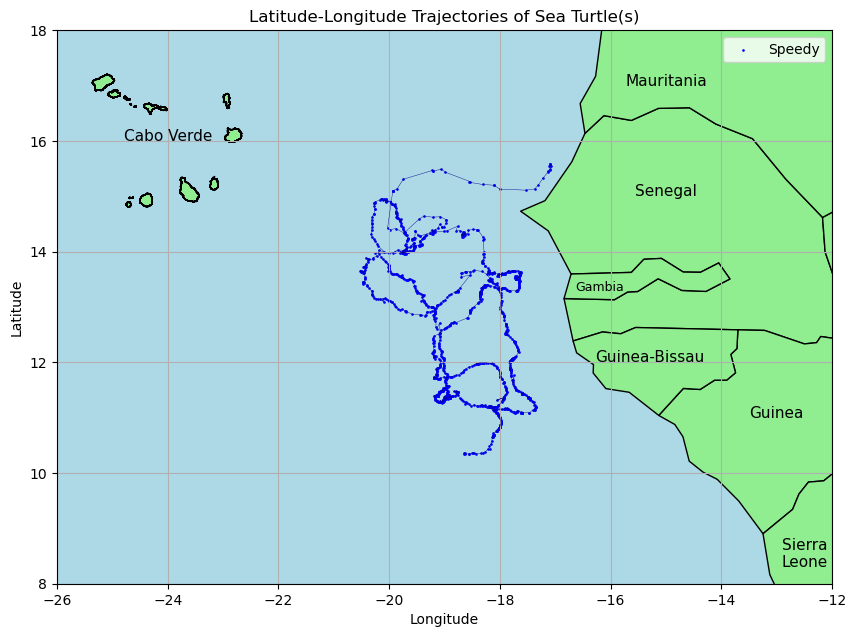

In [355]:
speedy_dataset = TurtleData("speedy")
manou_dataset = TurtleData("manou")     
lola_dataset = TurtleData("lola")      # Here, we set up three instances of the class for each turtle.

speedy_dataset.filter_quality_greater_than_measure(0)  # Filtering for entries of quality greater than zero.
speedy_dataset.filter_by_foraging_period()      # Filtering for the turtle's foraging period. 

speedy_dataset.plot_lat_long_trajectory()

## V. Plotting the $x$-velocity, $y$-velocity, and Speed Distributions <a id='section5'></a>

The *calculate_speed_and_velocities* method is used to calculate the speed, $x$-velocity, and $y$-velocity for Speedy, using the *speedy_dataset* instance of the *TurtleData* class established previously. 

The speed distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "speed" argument.

##### Click [here](#section0) to return to the Contents page.

C:\Users\blam9\AppData\Local\Temp\ipykernel_19884\642461194.py:410: RuntimeWarning: divide by zero encountered in scalar divide
  speed[i] = km_speed[i] / (timediff_array[i+1]/3600)
C:\Users\blam9\AppData\Local\Temp\ipykernel_19884\642461194.py:411: RuntimeWarning: divide by zero encountered in scalar divide
  v_y[i] = km_y[i] / (timediff_array[i+1]/3600)
C:\Users\blam9\AppData\Local\Temp\ipykernel_19884\642461194.py:412: RuntimeWarning: divide by zero encountered in scalar divide
  v_x[i] = km_x[i] / (timediff_array[i+1]/3600)


The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


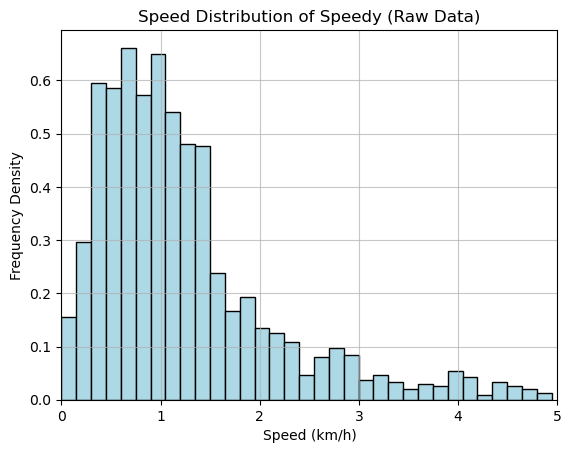

In [358]:
speedy_dataset.calculate_speed_and_velocities()
speedy_dataset.plot_speed_or_velocity_distribution("speed")
plt.savefig("00.jpg", bbox_inches = "tight")

The $x$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "x_velocity" argument.

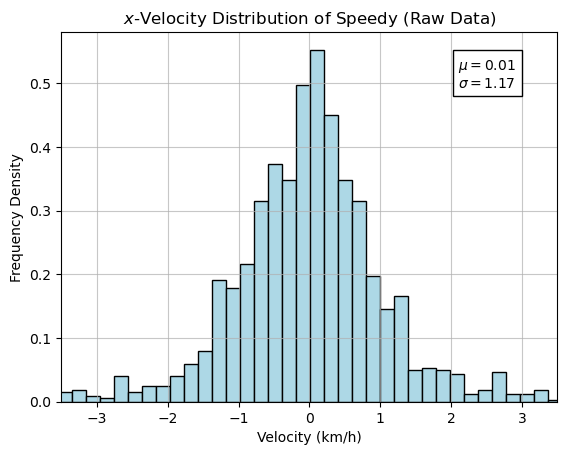

In [360]:
speedy_dataset.plot_speed_or_velocity_distribution("x_velocity")

plt.savefig("01.jpg", bbox_inches = "tight")

The $y$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "y_velocity" argument.

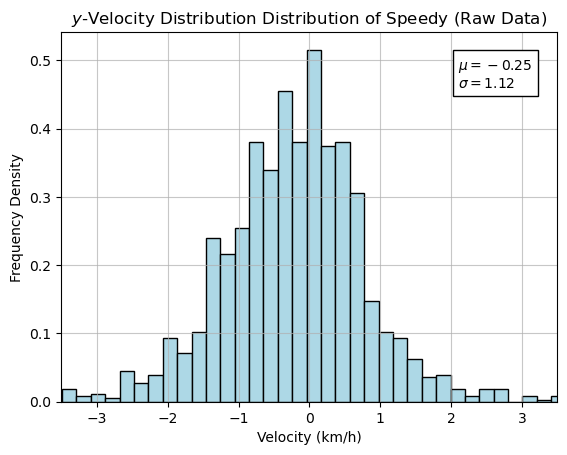

In [362]:
speedy_dataset.plot_speed_or_velocity_distribution("y_velocity")
plt.savefig("02.jpg", bbox_inches = "tight")

## VI. Plotting a Boxplot to Understand Time Variation in GPS Recordings <a id='section6'></a>

Below, the *plot_boxplot* method is used to plot a box-and-whisker diagram to establish time differences in GPS recordings. The importance of this is to realise how the closeness of GPS recordings is impacting the validity of the data. 

##### Click [here](#section0) to return to the Contents page.

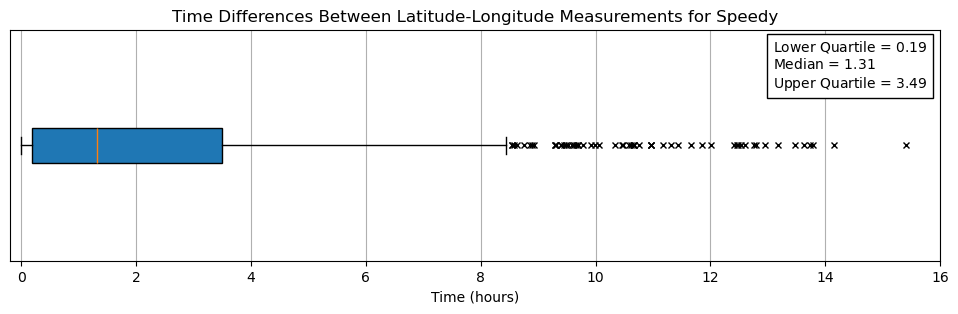

In [365]:
speedy_dataset.plot_boxplot()

## VII. Interpolating the Data <a id='section7'></a>

In this section, we initialise three instances of the TurtleData class. Then, we filter the data by those entries greater than a quality measure of zero, using the *filter_quality_greater_than_measure* method, and filter by the foraging period of the turtle using the *filter_by_foraging_period* method.

The filtered data is then inteprolated using the *interpolate_data* method.

##### Click [here](#section0) to return to the Contents page.

In [368]:
speedy_dataset = TurtleData("speedy")
manou_dataset = TurtleData("manou")
lola_dataset = TurtleData("lola")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.interpolate_data()

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
695         NaN
696      3641.0
697         0.0
701     37749.0
703      2337.0
         ...   
3698     2492.0
3705    39476.0
3708     8435.0
3710     6130.0
3711     3462.0
Name: Time_diff, Length: 1767, dtype: float64
16682356.0
[0.00000000e+00 4.72082277e+03 9.44164555e+03 ... 1.66692252e+07
 1.66739460e+07 1.66786669e+07]
              Date   Latitude  Longitude
0     0.000000e+00        NaN        NaN
1     4.720823e+03  15.579382 -17.089480
2     9.441646e+03  15.575367 -17.089392
3     1.416247e+04  15.571353 -17.089305
4     1.888329e+04  15.567339 -17.089217
...            ...        ...        ...
3529  1.665978e+07  10.346916 -18.615687
3530  1.666450e+07  10.347487 -18.622855
3531  1.666923e+07  10.349838 -18.635112
3532  1.667395e+07  10.353856 -18.642854
3533  1.667867e+07  10.362866 -18.637078

[3534 rows x 3 colu

The speed distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "speed" argument.

The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


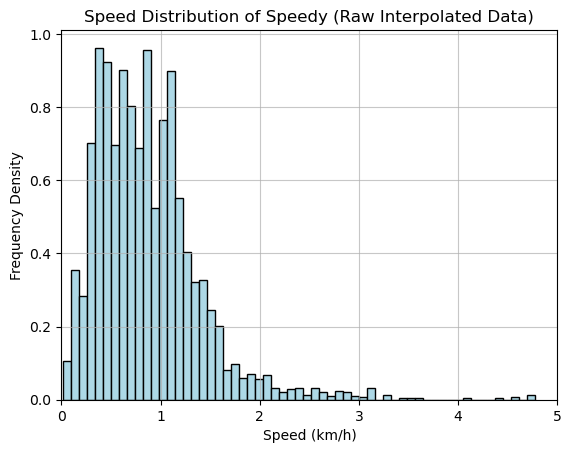

In [370]:
speedy_dataset.calculate_speed_and_velocities()
speedy_dataset.plot_speed_or_velocity_distribution("speed")
plt.savefig("10.jpg", bbox_inches = "tight")

The $x$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "x_velocity" argument.

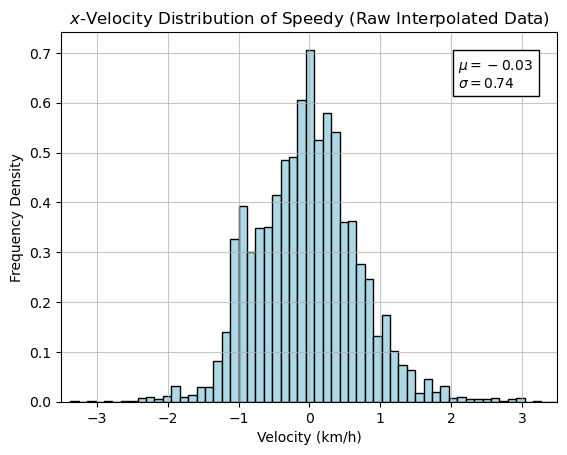

In [372]:
speedy_dataset.plot_speed_or_velocity_distribution("x_velocity")
plt.savefig("11.jpg", bbox_inches = "tight")

The $y$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "y_velocity" argument.

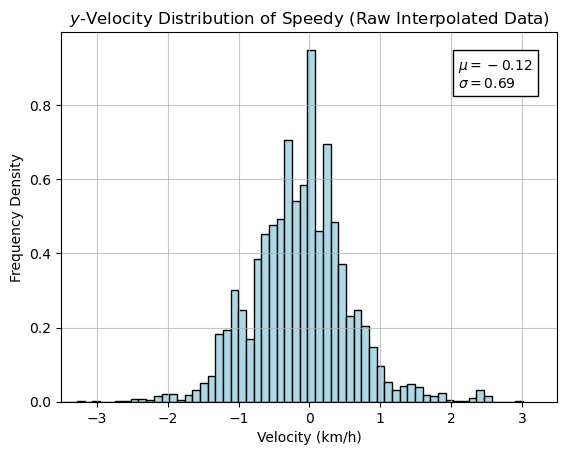

In [374]:
speedy_dataset.plot_speed_or_velocity_distribution("y_velocity")
plt.savefig("12.jpg", bbox_inches = "tight")

## VIII. Cleaning the Data <a id='section8'></a>

In this section, we initialise one instance of the TurtleData class. Then, we filter the data by those entries greater than a quality measure of zero, using the *filter_quality_greater_than_measure* method, and filter by the foraging period of the turtle using the *filter_by_foraging_period* method.

We then clean the filtered data by utilising the *clean_data* method to clean the data.

##### Click [here](#section0) to return to the Contents page.

In [234]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()

print(speedy_dataset.dataframe)

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
                    Date   Type Quality  Latitude  Longitude  Time_diff
696  2021-10-18 10:33:12  Argos       1   15.5767   -17.0919     3641.0
703  2021-10-18 21:41:18  Argos       1   15.5435   -17.1079     2337.0
708  2021-10-19 12:00:52  Argos       1   15.5000   -17.0864    18051.0
709  2021-10-19 18:47:56  Argos       3   15.4758   -17.1002    24424.0
716  2021-10-20 07:50:12  Argos       2   15.4368   -17.1299     3688.0
...                  ...    ...     ...       ...        ...        ...
3697 2022-04-28 18:51:52  Argos       2   10.3399   -18.5585    23315.0
3698 2022-04-28 19:33:24  Argos       1   10.3432   -18.5641     2492.0
3708 2022-04-29 08:51:55  Argos       1   10.3516   -18.6443     8435.0
3710 2022-04-29 10:34:05  Argos

The speed distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "speed" argument.

The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


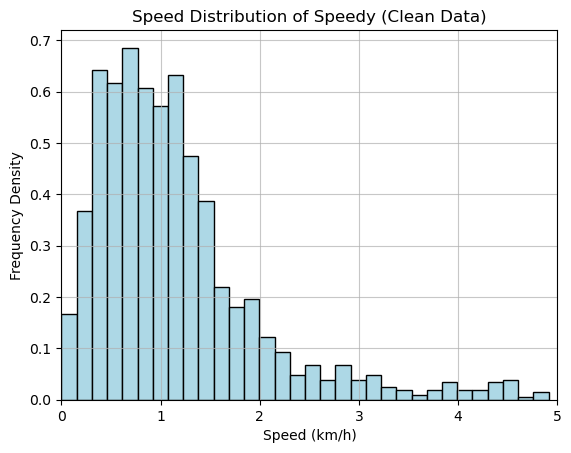

In [236]:
speedy_dataset.calculate_speed_and_velocities()
speedy_dataset.plot_speed_or_velocity_distribution("speed")
plt.savefig("20.jpg", bbox_inches = "tight")

The $x$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "x_velocity" argument.

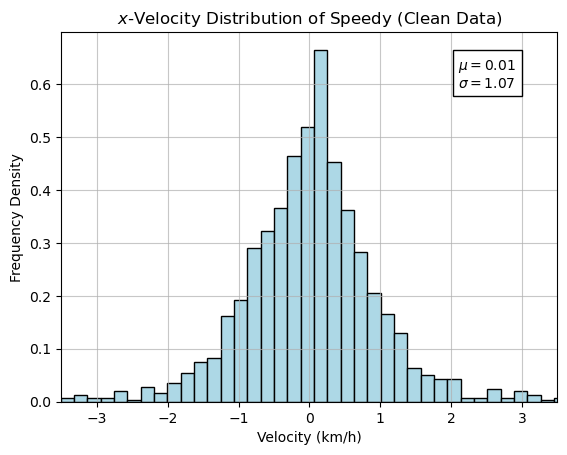

In [238]:
speedy_dataset.plot_speed_or_velocity_distribution("x_velocity")
plt.savefig("21.jpg", bbox_inches = "tight")

The $y$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "y_velocity" argument.

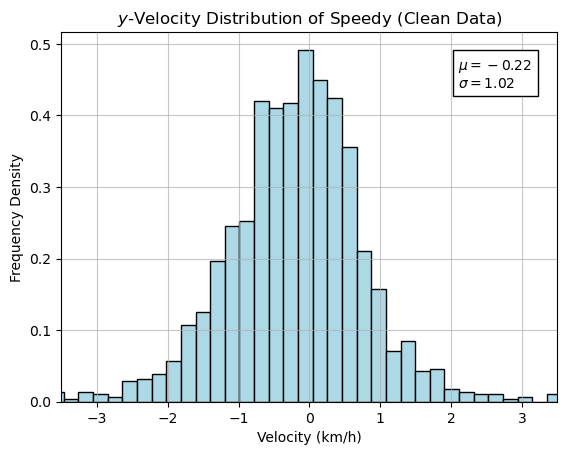

In [240]:
speedy_dataset.plot_speed_or_velocity_distribution("y_velocity")
plt.savefig("22.jpg", bbox_inches = "tight")

## IX. Cleaning and Interpolating the Data <a id='section9'></a>

In this section, we initialise one instance of the TurtleData class. Then, we filter the data by those entries greater than a quality measure of zero, using the *filter_quality_greater_than_measure* method, and filter by the foraging period of the turtle using the *filter_by_foraging_period* method.

The filtered data is then inteprolated using the *interpolate_data* method and cleaned using the *clean_data* method.

We have then plotted a box-and-whisker diagram (as in Section *VI.*) to compare with the previous boxplot diagram. This illustrates the cleaning process, as we hav eremoved entries that are chronologically too close or chornologically too far apart. 

##### Click [here](#section0) to return to the Contents page.

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
                    Date   Type Quality  Latitude  Longitude  Time_diff
696  2021-10-18 10:33:12  Argos       1   15.5767   -17.0919     3641.0
703  2021-10-18 21:41:18  Argos       1   15.5435   -17.1079     2337.0
708  2021-10-19 12:00:52  Argos       1   15.5000   -17.0864    18051.0
709  2021-10-19 18:47:56  Argos       3   15.4758   -17.1002    24424.0
716  2021-10-20 07:50:12  Argos       2   15.4368   -17.1299     3688.0
...                  ...    ...     ...       ...        ...        ...
3697 2022-04-28 18:51:52  Argos       2   10.3399   -18.5585    23315.0
3698 2022-04-28 19:33:24  Argos       1   10.3432   -18.5641     2492.0
3708 2022-04-29 08:51:55  Argos       1   10.3516   -18.6443     8435.0
3710 2022-04-29 10:34:05  Argos

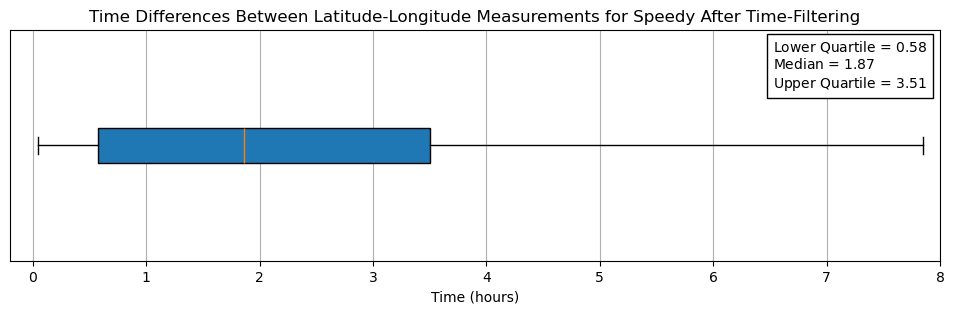

In [243]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)

speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()

print(speedy_dataset.dataframe)

speedy_dataset.plot_boxplot()

In [244]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()


speedy_dataset.interpolate_data()

print(speedy_dataset.dataframe)



The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
696      3641.0
703      2337.0
708     18051.0
709     24424.0
716      3688.0
         ...   
3697    23315.0
3698     2492.0
3708     8435.0
3710     6130.0
3711     3462.0
Name: Time_diff, Length: 1390, dtype: float64
11146258.710113
[0.0000000e+00 6.7320000e+03 1.3464000e+04 ... 1.1127996e+07 1.1134728e+07
 1.1141460e+07]
            Date   Latitude  Longitude
0            0.0  15.576700 -17.091900
1         6732.0  15.541683 -17.107002
2        13464.0  15.525460 -17.098984
3        20196.0  15.509237 -17.090965
4        26928.0  15.497128 -17.088038
...          ...        ...        ...
1651  11114532.0  10.351533 -18.529321
1652  11121264.0  10.344546 -18.546848
1653  11127996.0  10.342888 -18.563570
1654  11134728.0  10.349669 -18.

The speed distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "speed" argument.

The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


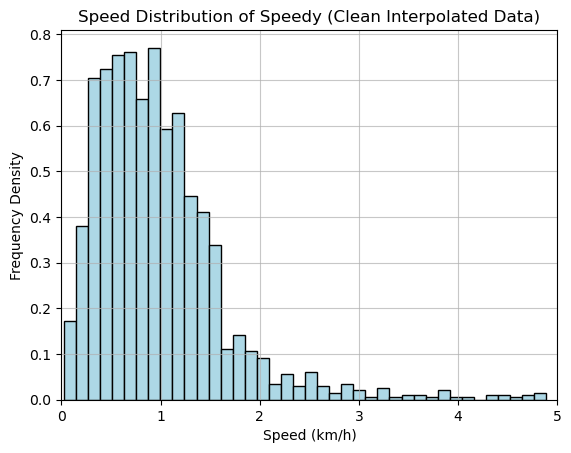

In [246]:
speedy_dataset.calculate_speed_and_velocities()
speedy_dataset.plot_speed_or_velocity_distribution("speed")

plt.savefig("30.jpg", bbox_inches = "tight")

The $y$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "y_velocity" argument.

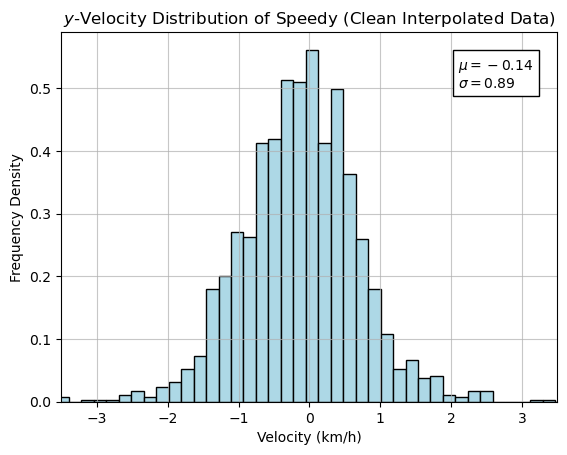

In [248]:
speedy_dataset.plot_speed_or_velocity_distribution("y_velocity")
plt.savefig("32.jpg", bbox_inches = "tight")

The $x$-velocity distribution is then plotted below using the *plot_speed_or_velocity_distribution* method together with the "x_velocity" argument.

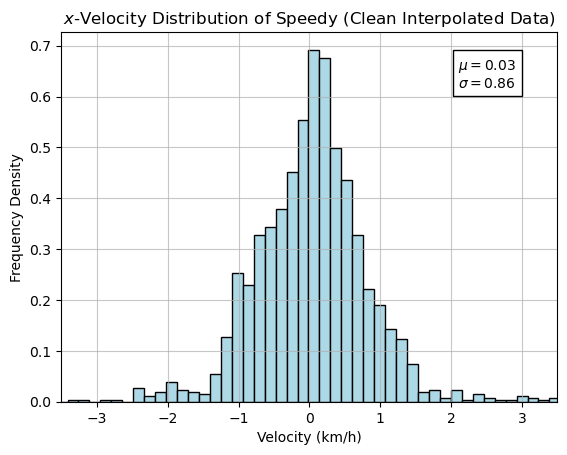

In [251]:
speedy_dataset.plot_speed_or_velocity_distribution("x_velocity")
plt.savefig("31.jpg", bbox_inches = "tight")

## X. Fitting the Cleaned and Interpolated Data to Various Distributions <a id='section10'></a>

In this section, we perform simple fits to fit the cleaned, interpolated data to various known statistical distributions which have been associated with the theory of movement. 

##### Click [here](#section0) to return to the Contents page.

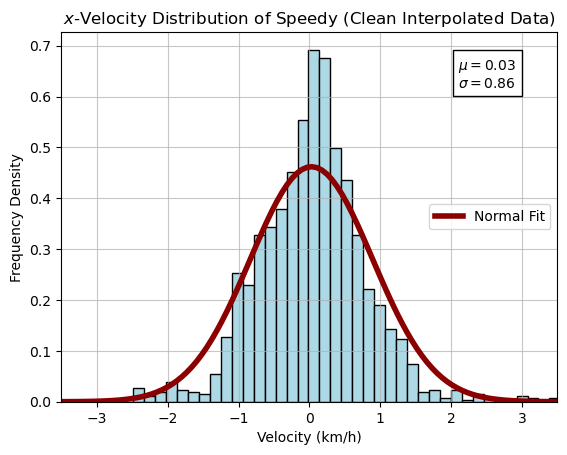

In [254]:
speedy_dataset.plot_speed_or_velocity_distribution("x_velocity", "normal")

plt.savefig("SF_2.jpg", bbox_inches = "tight")

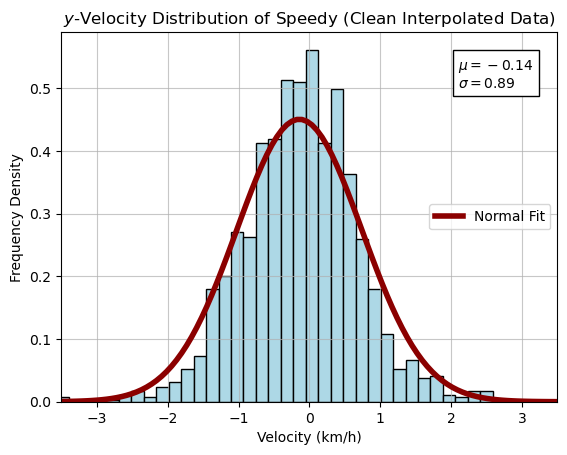

In [256]:
speedy_dataset.plot_speed_or_velocity_distribution("y_velocity", "normal")
plt.savefig("SF_3.jpg", bbox_inches = "tight")

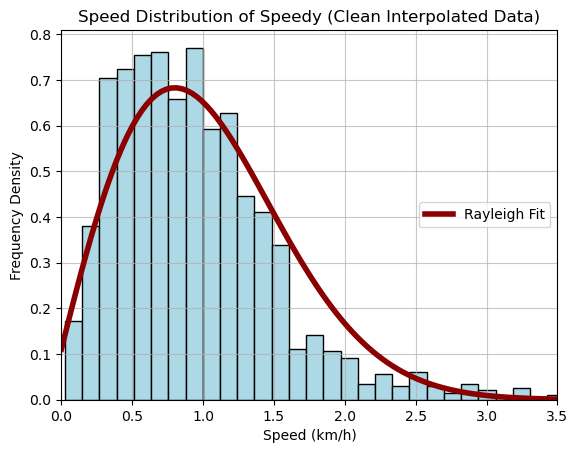

In [257]:
speedy_dataset.plot_speed_or_velocity_distribution("speed", "rayleigh")
plt.savefig("SF_1.jpg", bbox_inches = "tight")

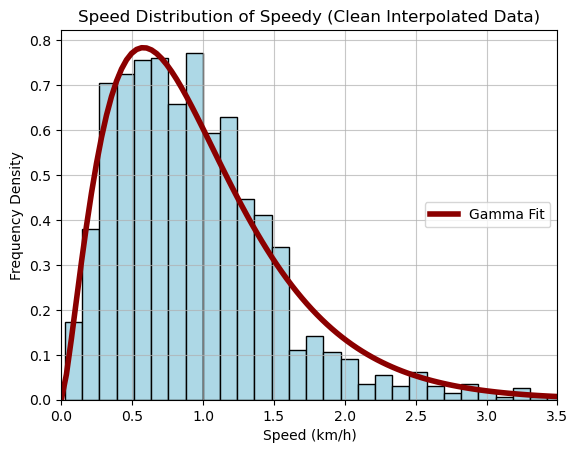

In [258]:
speedy_dataset.plot_speed_or_velocity_distribution("speed", "gamma")
plt.savefig("SF_Gamma.jpg", bbox_inches = "tight")

## XI. Semi-log Plots and Log-log Plots to Analyse the Tails <a id='section11'></a>

This section uses the *plot_tails_semilog_plot* or the *plot_tails_loglog_plot* methods to plot the tails of the various physical quantities to a semi-log plot or a log-log plot respectively. 

As per the motivation in the thesis, if the distribution's tail(s) are decaying exponentially, we would expect to observe a linear relationship in a semi-log plot. 

However, if the distribution's tail(s) are decaying as a power law, we would expect to observe a linear relationship in a log-log plot. 

##### Click [here](#section0) to return to the Contents page.

[0.08379339 0.20178429 0.31977519 0.43776608 0.55575698 0.67374788
 0.79173877 0.90972967 1.02772057 1.14571146 1.26370236 1.38169326
 1.49968415 1.61767505 1.73566595 1.85365684 1.97164774 2.08963864
 2.20762953 2.32562043 2.44361133 2.56160222 2.67959312 2.79758401
 2.91557491 3.03356581 3.1515567  3.2695476 ]
[0.37055972 0.19586728 0.11646163 0.16410502 0.06352452 0.06881823
 0.04764339 0.04764339 0.02646855 0.05823081 0.02117484 0.03705597
 0.01588113 0.02117484 0.00529371 0.03176226]


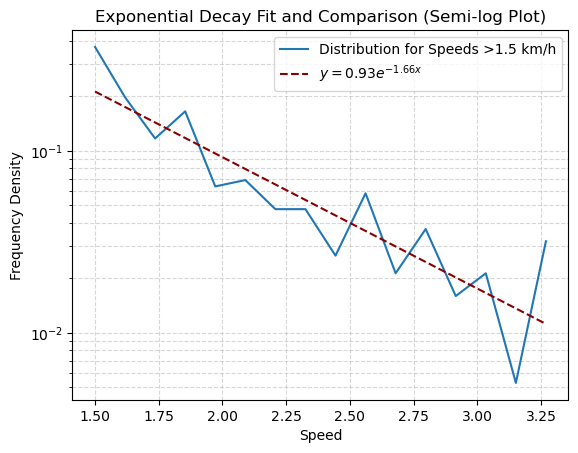

In [261]:
speedy_dataset.plot_tails_semilog_plot("speed")

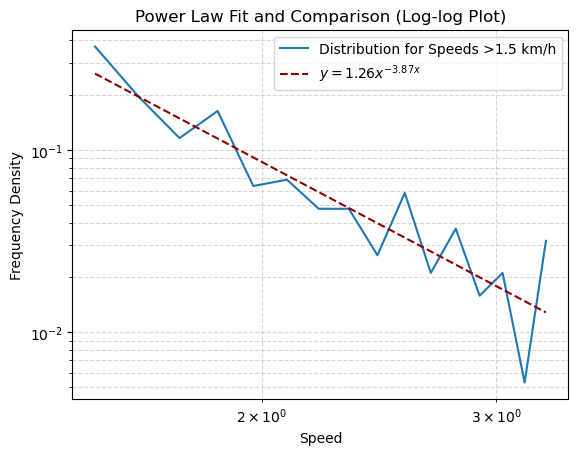

In [263]:
speedy_dataset.plot_tails_loglog_plot("speed")
plt.savefig("speed_loglog.jpg", bbox_inches = "tight")

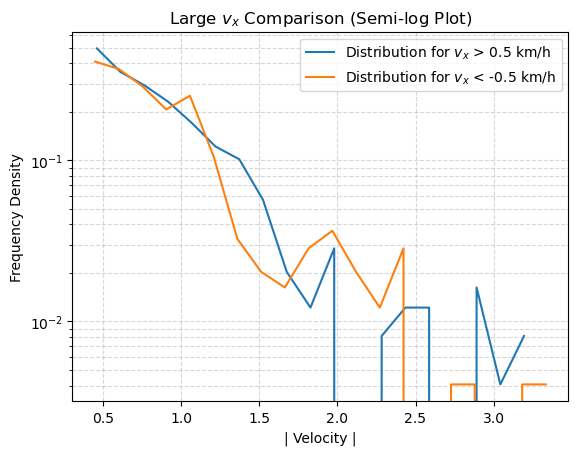

In [264]:
speedy_dataset.plot_tails_semilog_plot("x_velocity")


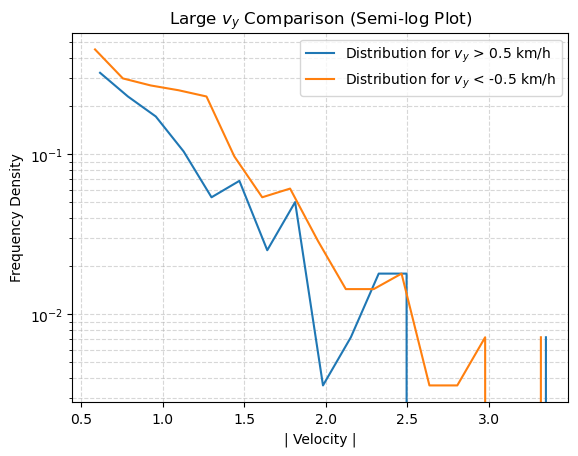

In [265]:
speedy_dataset.plot_tails_semilog_plot("y_velocity")


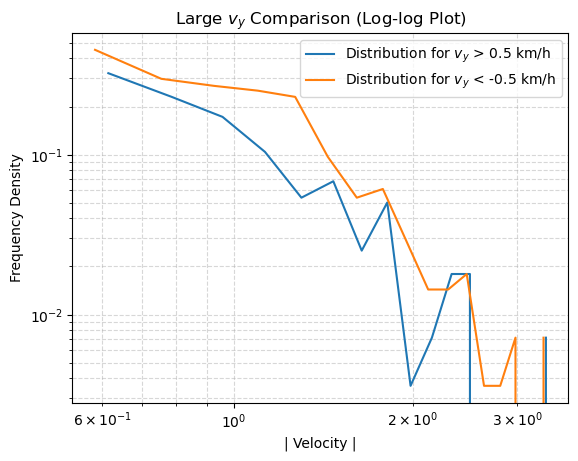

In [266]:
speedy_dataset.plot_tails_loglog_plot("y_velocity")


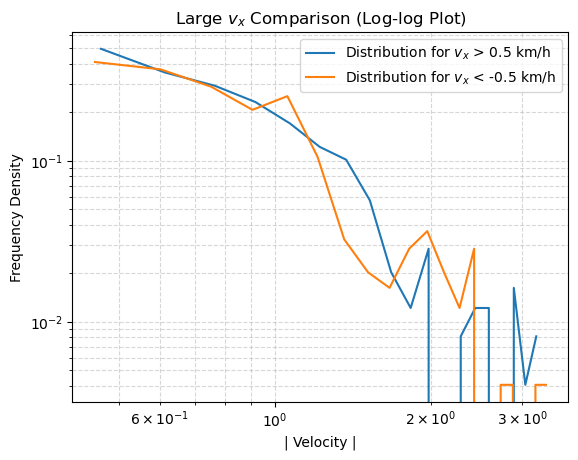

In [267]:
speedy_dataset.plot_tails_loglog_plot("x_velocity")


## XII. Quantile-Quantile Plots with Coefficients of Determination <a id='section12'></a>

A quantile-quantile plot enables us to see to what extent a dataset fits a given distribution. The closer the points fit the red straight line, the more the dataset is said to fit the distribution. 

Since many of the below quintile-quintile plots are similar, I decided to implement a coefficient of determination ( $R^2$ ) calculation to quantify the closeness of each fit. The coefficient of determination often ranges from zero to one; a value close to one signifies a good fit by the empirical data to the given distribution.

In this section, we plot the quantile-quantile plot, using the *plot_quantile_quantile* method, for each physical quantity against various known distributions to determine how well each physical quantity adheres to the functional form of various distributions. 

##### Click [here](#section0) to return to the Contents page.

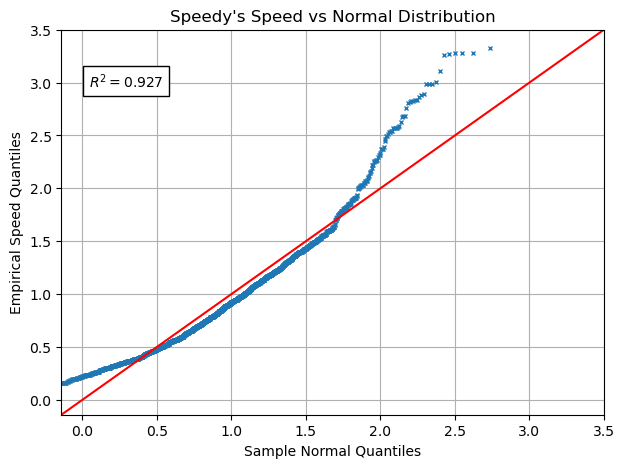

In [272]:
speedy_dataset.plot_quantile_quantile("speed", "normal")
plt.savefig("qq speed vs normal.jpg", bbox_inches = "tight")

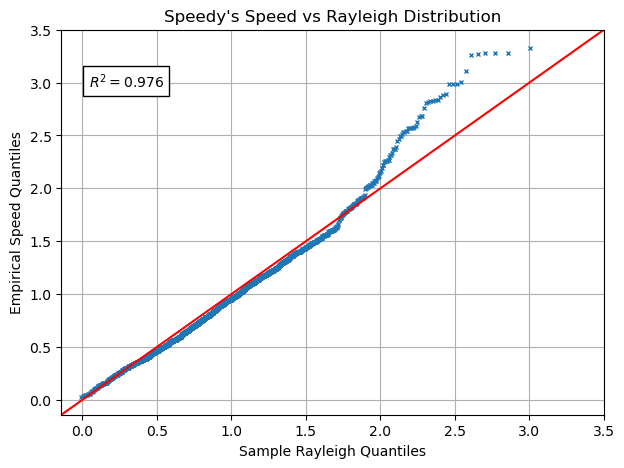

In [273]:
speedy_dataset.plot_quantile_quantile("speed", "rayleigh")
plt.savefig("qq speed vs rayleigh.jpg", bbox_inches = "tight")

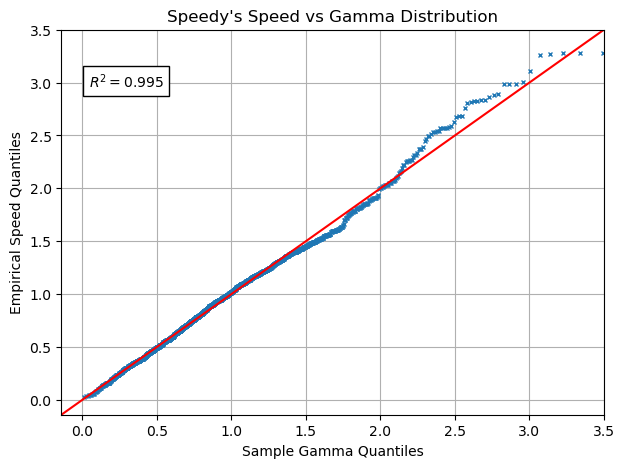

In [274]:
speedy_dataset.plot_quantile_quantile("speed", "gamma")
plt.savefig("qq speed vs gamma.jpg", bbox_inches = "tight")

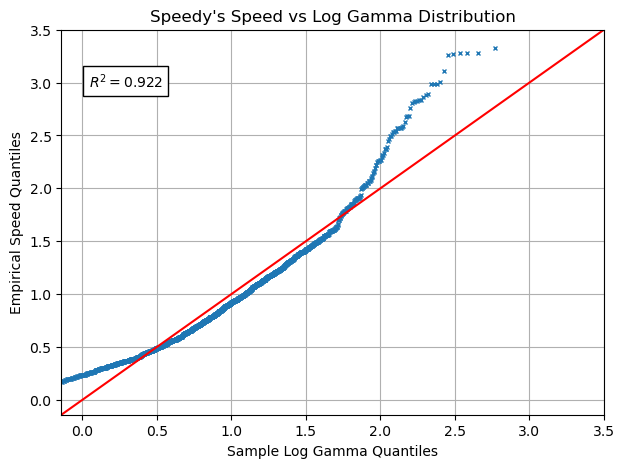

In [276]:
speedy_dataset.plot_quantile_quantile("speed", "log_gamma")
plt.savefig("qq speed vs log_gamma.jpg", bbox_inches = "tight")

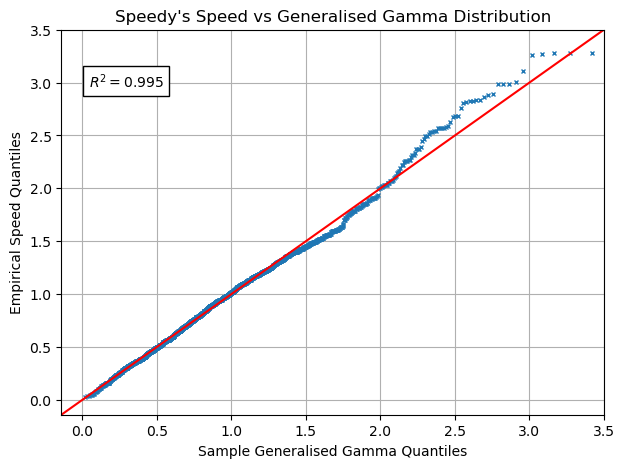

In [277]:
speedy_dataset.plot_quantile_quantile("speed", "generalised_gamma")
plt.savefig("qq speed vs gen gamma.jpg", bbox_inches = "tight")

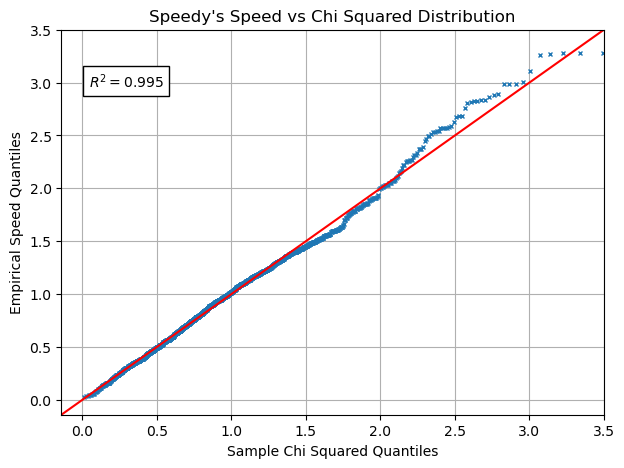

In [278]:
speedy_dataset.plot_quantile_quantile("speed", "chi_squared")
#plt.savefig("qq speed vs chi squared.jpg", bbox_inches = "tight")

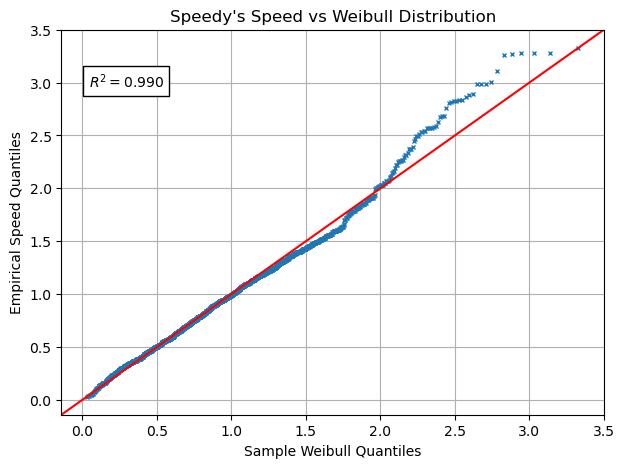

In [279]:
speedy_dataset.plot_quantile_quantile("speed", "weibull")
plt.savefig("qq speed vs weibull.jpg", bbox_inches = "tight")

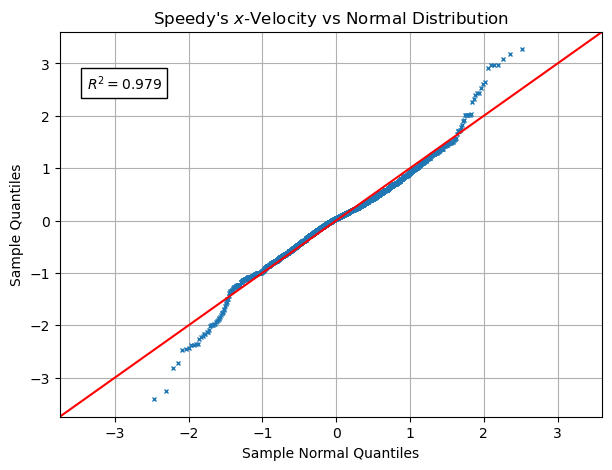

In [280]:
speedy_dataset.plot_quantile_quantile("x_velocity", "normal")
plt.savefig("qq vx vs normal.jpg", bbox_inches = "tight")

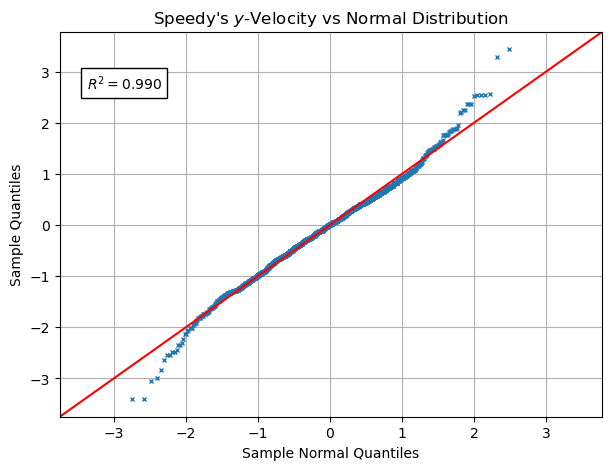

In [281]:
speedy_dataset.plot_quantile_quantile("y_velocity", "normal")
plt.savefig("qq vy vs normal.jpg", bbox_inches = "tight")

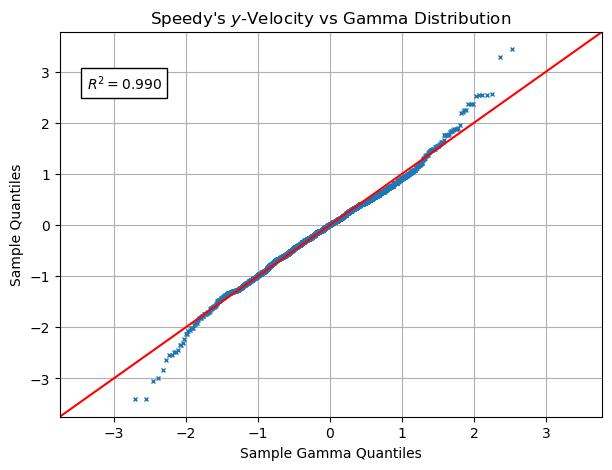

In [283]:
speedy_dataset.plot_quantile_quantile("y_velocity", "gamma")


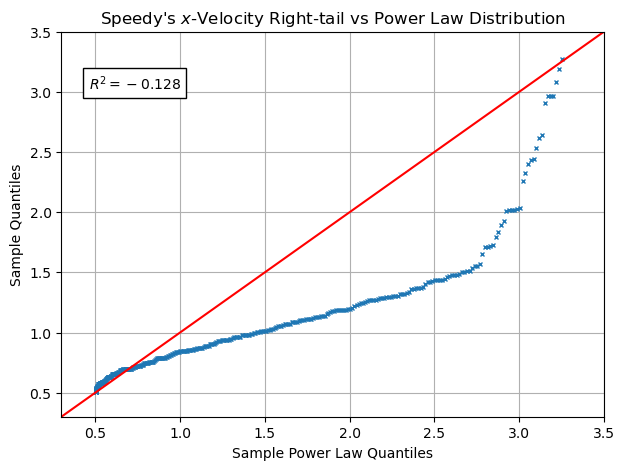

In [284]:
speedy_dataset.plot_quantile_quantile("x_velocity", "power_law", "right")
plt.savefig("qq vx right tail vs powerlaw.jpg", bbox_inches = "tight")

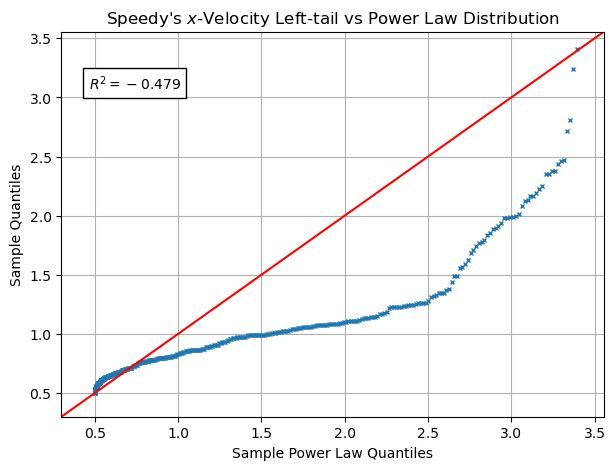

In [285]:
speedy_dataset.plot_quantile_quantile("x_velocity", "power_law", "left")
plt.savefig("qq vx left tail vs powerlaw.jpg", bbox_inches = "tight")

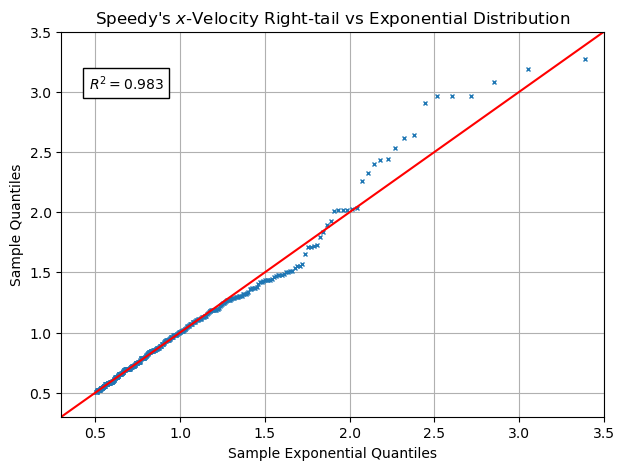

In [286]:
speedy_dataset.plot_quantile_quantile("x_velocity", "exponential", "right")
plt.savefig("qq vx right tail vs exp.jpg", bbox_inches = "tight")

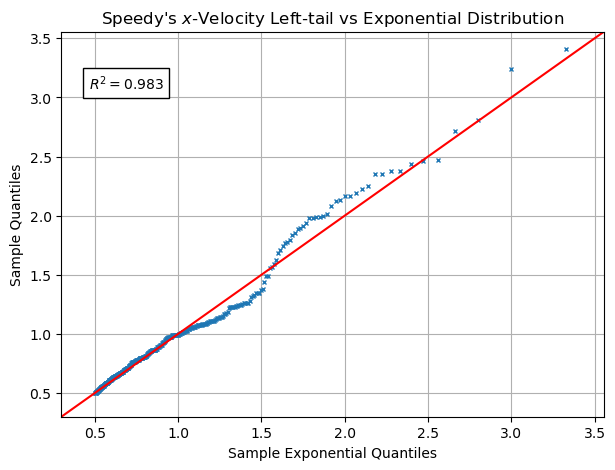

In [287]:
speedy_dataset.plot_quantile_quantile("x_velocity", "exponential", "left")
plt.savefig("qq vx left tail vs exp.jpg", bbox_inches = "tight")

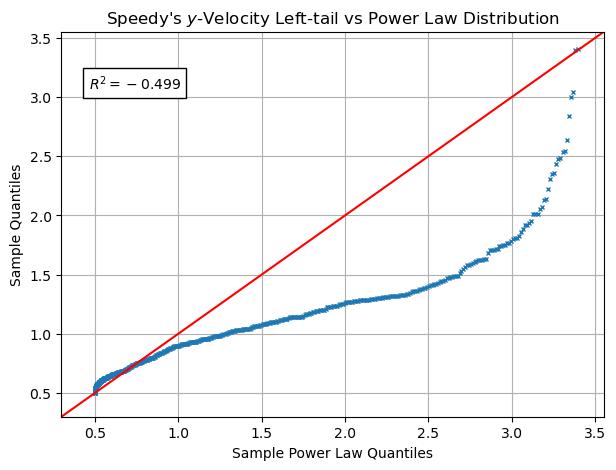

In [288]:
speedy_dataset.plot_quantile_quantile("y_velocity", "power_law", "left")


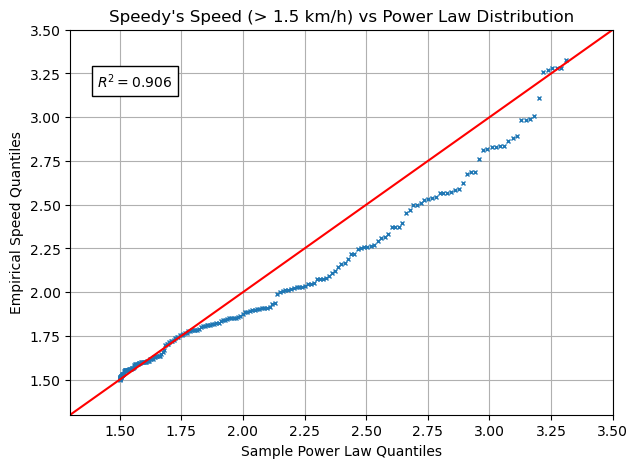

In [290]:
speedy_dataset.plot_quantile_quantile("speed", "power_law", "right")
plt.savefig("qq speed right tail vs powerlaw.jpg", bbox_inches = "tight")

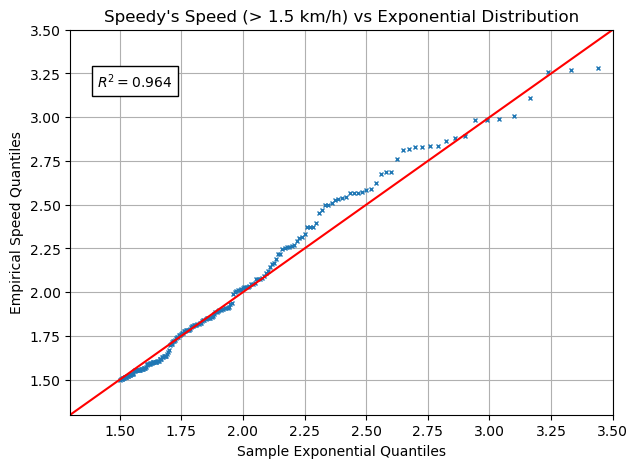

In [291]:
speedy_dataset.plot_quantile_quantile("speed", "exponential", "right")
plt.savefig("qq speed right tail vs exp.jpg", bbox_inches = "tight")

## XIII. Cleaned and Interpolated Plots <a id='section13'></a>

This section contains the experimental attempts of plotting the cleaned and inteprolated data. Many of these plots did not make it into the final thesis.

##### Click [here](#section0) to return to the Contents page.

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
696      3641.0
703      2337.0
708     18051.0
709     24424.0
716      3688.0
         ...   
3697    23315.0
3698     2492.0
3708     8435.0
3710     6130.0
3711     3462.0
Name: Time_diff, Length: 1390, dtype: float64
11146258.710113
[0.0000000e+00 6.7320000e+03 1.3464000e+04 ... 1.1127996e+07 1.1134728e+07
 1.1141460e+07]
            Date   Latitude  Longitude
0            0.0  15.576700 -17.091900
1         6732.0  15.541683 -17.107002
2        13464.0  15.525460 -17.098984
3        20196.0  15.509237 -17.090965
4        26928.0  15.497128 -17.088038
...          ...        ...        ...
1651  11114532.0  10.351533 -18.529321
1652  11121264.0  10.344546 -18.546848
1653  11127996.0  10.342888 -18.563570
1654  11134728.0  10.349669 -18.

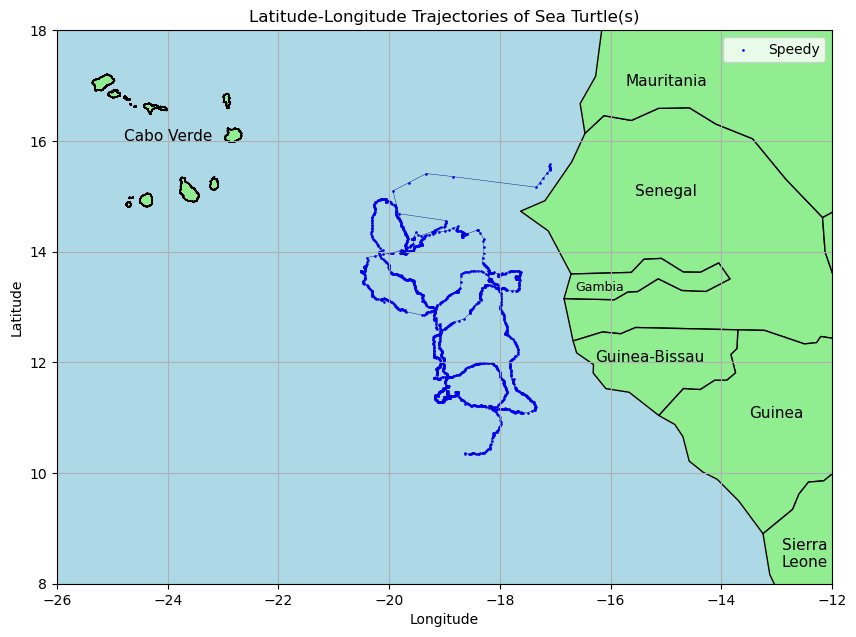

In [384]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()


speedy_dataset.interpolate_data()

#print(speedy_dataset.dataframe)

#speedy_dataset.dataframe.to_csv('speedy_cleaned_interpolated.csv', index=True)


speedy_dataset.plot_lat_long_trajectory()

## XIV. Plots of Speed Throughout the Foraging Period <a id='section14'></a>

This section shows the speed of Speedy throughout the foraging period. I have used a plasma colourbar to display the speed. A thermally hot colour indicates that Speedy is moving relatively quickly, a thermally cool colour indicates Speedy is moving relatively slowly. 

##### Click [here](#section0) to return to the Contents page.

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
696      3641.0
703      2337.0
708     18051.0
709     24424.0
716      3688.0
         ...   
3697    23315.0
3698     2492.0
3708     8435.0
3710     6130.0
3711     3462.0
Name: Time_diff, Length: 1390, dtype: float64
11146258.710113
[0.0000000e+00 6.7320000e+03 1.3464000e+04 ... 1.1127996e+07 1.1134728e+07
 1.1141460e+07]
            Date   Latitude  Longitude
0            0.0  15.576700 -17.091900
1         6732.0  15.541683 -17.107002
2        13464.0  15.525460 -17.098984
3        20196.0  15.509237 -17.090965
4        26928.0  15.497128 -17.088038
...          ...        ...        ...
1651  11114532.0  10.351533 -18.529321
1652  11121264.0  10.344546 -18.546848
1653  11127996.0  10.342888 -18.563570
1654  11134728.0  10.349669 -18.

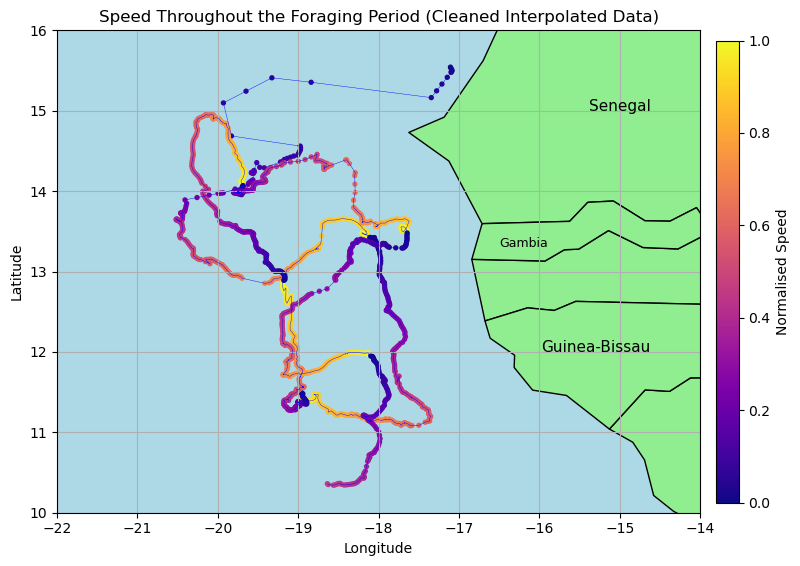

In [387]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()
speedy_dataset.interpolate_data()

speedy_dataset.plot_speed_over_trajectory()

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
The 'Speedy' dataset has been cleaned of short time differences and long time differences.
                    Date   Type Quality  Latitude  Longitude  Time_diff
696  2021-10-18 10:33:12  Argos       1   15.5767   -17.0919        NaN
703  2021-10-18 21:41:18  Argos       1   15.5435   -17.1079    40086.0
708  2021-10-19 12:00:52  Argos       1   15.5000   -17.0864    51574.0
709  2021-10-19 18:47:56  Argos       3   15.4758   -17.1002    24424.0
716  2021-10-20 07:50:12  Argos       2   15.4368   -17.1299    46936.0
...                  ...    ...     ...       ...        ...        ...
3697 2022-04-28 18:51:52  Argos       2   10.3399   -18.5585    23315.0
3698 2022-04-28 19:33:24  Argos       1   10.3432   -18.5641     2492.0
3708 2022-04-29 08:51:55  Argos       1   10.3516   -18.6443    47911.0
3710 2022-04-29 10:34:05  Argos

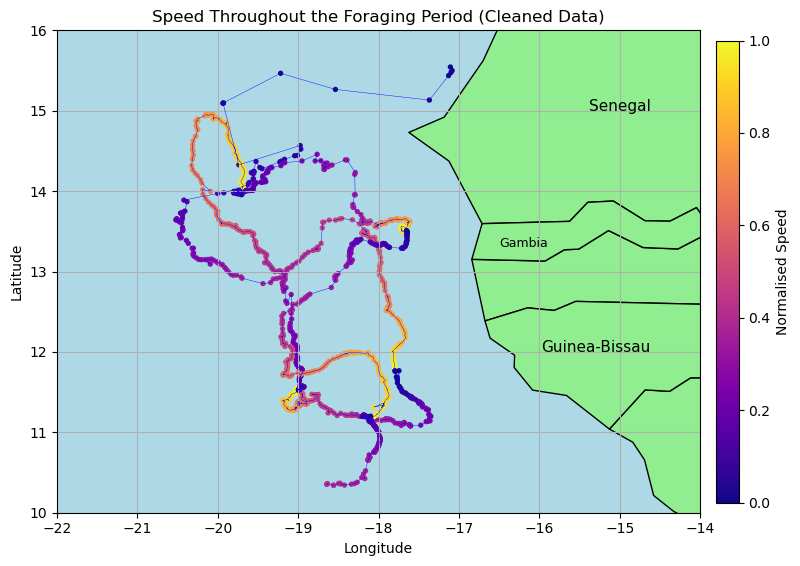

In [388]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.clean_data()

speedy_dataset.plot_speed_over_trajectory()

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
                    Date   Type Quality  Latitude  Longitude  Time_diff
695  2021-10-18 09:32:31  Argos       1   15.5753   -17.1012        NaN
696  2021-10-18 10:33:12  Argos       1   15.5767   -17.0919     3641.0
697  2021-10-18 10:33:12  Argos       2   15.5803   -17.0895        0.0
701  2021-10-18 21:02:21  Argos       1   15.5482   -17.0888    37749.0
703  2021-10-18 21:41:18  Argos       1   15.5435   -17.1079     2337.0
...                  ...    ...     ...       ...        ...        ...
3698 2022-04-28 19:33:24  Argos       1   10.3432   -18.5641     2492.0
3705 2022-04-29 06:31:20  Argos       2   10.3474   -18.6224    39476.0
3708 2022-04-29 08:51:55  Argos       1   10.3516   -18.6443     8435.0
3710 2022-04-29 10:34:05  Argos       3   10.3633   -18.6368     6130.0
3711 2022-04-29 11:31:47  Argos       3   10.3550 

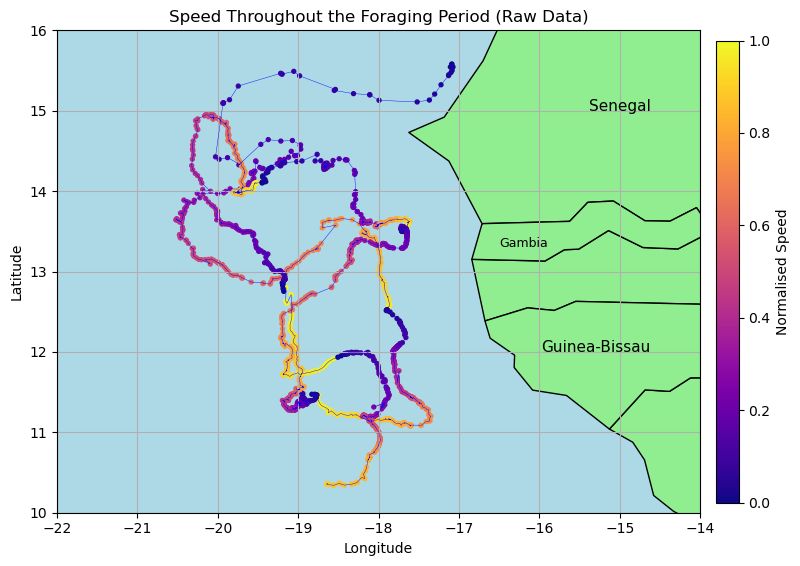

In [389]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.plot_speed_over_trajectory()

The quality of the 'Speedy' dataset has been set to those entries greater than 0.
The 'Speedy' dataset has been filtered to display Speedy's foraging period.
695         NaN
696      3641.0
697         0.0
701     37749.0
703      2337.0
         ...   
3698     2492.0
3705    39476.0
3708     8435.0
3710     6130.0
3711     3462.0
Name: Time_diff, Length: 1767, dtype: float64
16682356.0
[0.00000000e+00 4.72082277e+03 9.44164555e+03 ... 1.66692252e+07
 1.66739460e+07 1.66786669e+07]
              Date   Latitude  Longitude
0     0.000000e+00        NaN        NaN
1     4.720823e+03  15.579382 -17.089480
2     9.441646e+03  15.575367 -17.089392
3     1.416247e+04  15.571353 -17.089305
4     1.888329e+04  15.567339 -17.089217
...            ...        ...        ...
3529  1.665978e+07  10.346916 -18.615687
3530  1.666450e+07  10.347487 -18.622855
3531  1.666923e+07  10.349838 -18.635112
3532  1.667395e+07  10.353856 -18.642854
3533  1.667867e+07  10.362866 -18.637078

[3534 rows x 3 colu

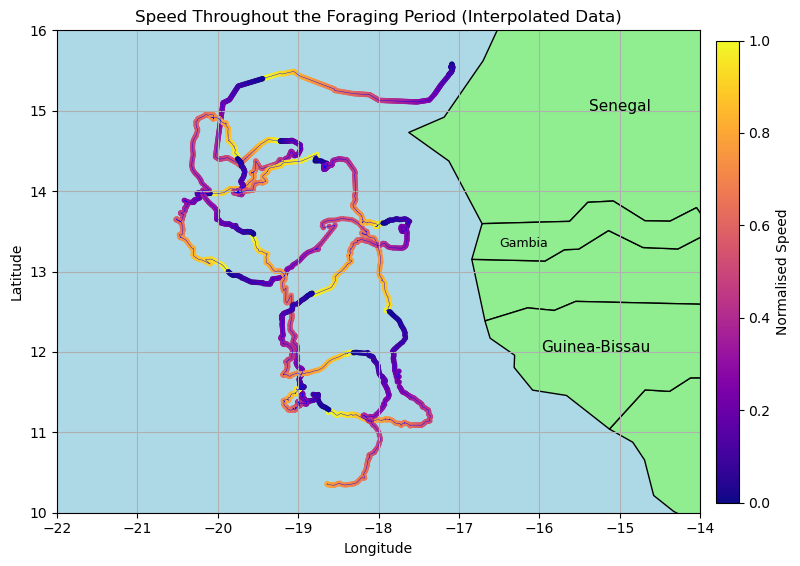

In [416]:
speedy_dataset = TurtleData("speedy")

speedy_dataset.filter_quality_greater_than_measure(0)
speedy_dataset.filter_by_foraging_period()

speedy_dataset.interpolate_data()

speedy_dataset.plot_speed_over_trajectory()

## XV. Mean Square Displacement Calculation <a id='section15'></a>
This section calculates the mean square displacement for a short time frame and the whole trajectory.

With support from Dattani of MatterModelling StackExchange:
https://mattermodeling.stackexchange.com/questions/11924/plot-msd-mean-square-displacement-versus-time-for-a-polymer-chain

##### Click [here](#section0) to return to the Contents page.

The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


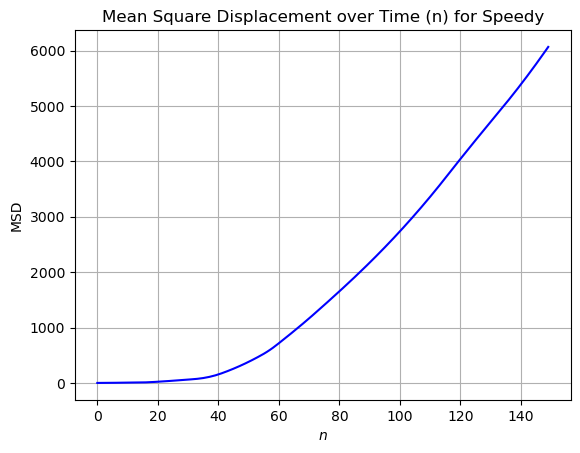

In [409]:
speedy_dataset.calculate_mean_square_displacement(150)

The physical quantities 'speed', 'y_velocity', and 'x_velocity' have been calculated. Try using the 'plot_speed_or_velocity_distribution' method!


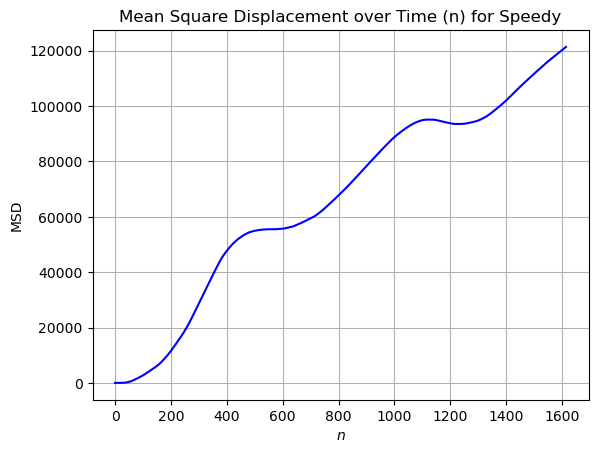

In [407]:
speedy_dataset.calculate_mean_square_displacement(1615)

## XVI. Jupyter Notebook Bibliography <a id='section16'></a>

This is a repository for online sources which I have used to construct this code. 

**Stochastic Processes**
- A guide on writing code to illustrate the Wiener process: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html
- Used to construct OU process code: https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process; https://sdepy.readthedocs.io/en/v1.2.0/generated/sdepy.ornstein_uhlenbeck_process.html; https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
- An introduction to Counter, as a means to count the number of walkers who have covered a displacement of $x$ after $n$ steps: https://realpython.com/python-counter/
- Sorting values of dictionaries (as my plt.plot function was not giving a sensible result): https://realpython.com/sort-python-dictionary/
  
**DataFrame Manipulation**
- Dataframes documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
- Dataframes introduction: https://www.w3schools.com/python/pandas/pandas_dataframes.asp
- Relevant methods: https://www.w3schools.com/python/pandas/pandas_ref_dataframe.asp
- Cleaning data: https://www.w3schools.com/python/pandas/pandas_cleaning.asp
- Filtering Data using .isin: https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
- Filtering data by other means: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

**Haversine Implementation**
- Formula implementation: https://www.askpython.com/python/examples/calculate-gps-distance-using-haversine-formula

**Plotting Lat-Long Data Using Pandas**
- How to plot lat-long from a .csv file: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
- fitting it to a map: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
- GeoPandas Introduction: https://jcutrer.com/python/learn-geopandas-plotting-usmaps
- How to plot a line with lat-long coordinates: https://gis.stackexchange.com/questions/344499/creating-linestring-from-csv-with-lat-lon-coordinates-of-beginning-and-ending-po

**Plotting a Boxplot**
- Tutorial on how to plot a boxplot: https://www.datacamp.com/tutorial/python-boxplots
- Boxplot pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

**Statistical Distribution Implementation: Fitting, Plotting, and Analysis**
- How to plot histograms: https://www.w3schools.com/python/matplotlib_histograms.asp; https://datagy.io/histogram-python/; https://www.programiz.com/python-programming/pandas/histogram
- Documentation for relevant statistical distributions: https://docs.scipy.org/doc/scipy/reference/stats.html
- Scipy fit documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html#scipy.stats.fit; https://docs.scipy.org/doc/scipy/reference/stats.html#fitting-survival-analysis
- Tutorial on using Scipy fit: https://pythonguides.com/python-scipy-stats-fit/
- Polynomial fitting for semi-log and log-log plots: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- Quantile-quantile plot: https://www.geeksforgeeks.org/quantile-quantile-plots/; https://www.statology.org/q-q-plot-python/
- Coefficient of Determination ( $R^2$ ) Implementation: https://www.askpython.com/python/coefficient-of-determination

**Speed Over Trajectory Plot**
- 'Colormap' documentation: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Quick 'colormap' example: https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
- 'Colorbar' implementation: https://ultrapythonic.com/colormaps-in-matplotlib/; https://docs.kanaries.net/topics/Matplotlib/matplotlib-colormaps
- matplotlib.cm 'normalization' documentation: https://matplotlib.org/stable/api/cm_api.html#module-matplotlib.cm

**Mean Square Displacement**
- Mean Square Displacement calculation: https://mattermodeling.stackexchange.com/questions/11924/plot-msd-mean-square-displacement-versus-time-for-a-polymer-chain

**Hyperlinked Contents Page**
- Guidance on how to add internal hyperlinks to a Jupyter notebook: https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook

##### Click [here](#section0) to return to the Contents page.